In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## 1. MÔ TẢ DỮ LIỆU

In [2]:
data = pd.read_csv('data/heart_disease_health_indicators_BRFSS2015.csv')
data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


**Mô tả các trường dữ liệu** :
1. **`HeartDiseaseorAttack` (Output)**: Người được khảo sát từng được chẩn đoán bệnh tim mạch vành (CHD) hoặc nhồi máu cơ tim (MI).
   - Giá trị: {`1.0`: True, `0.0`: False}
2. `HighBP`:  Người trưởng thành được bác sĩ, y tá hoặc chuyên gia y tế chẩn đoán cao huyết áp.
   - Giá trị: {`1.0`: True, `0.0`: False}
3. `HighChol`: Từng được chuyên gia y tế thông báo có mức cholesterol trong máu cao.
   - Giá trị: {`1.0`: True, `0.0`: False}
4. `CholCheck`: Đã kiểm tra cholesterol trong 5 năm gần đây.
   - Giá trị: {`1.0`: True, `0.0`: False}
5. `BMI`: Chỉ số cơ thể (Body Mass Index).
   - Giá trị: số thực
6. `Smoker`: Đã hút ít nhất 100 điếu thuốc trong suốt cuộc đời.
   - Giá trị: {`1.0`: True, `0.0`: False}
7. `Stroke`: Tiền sử đột quỵ.
   - Giá trị: {`1.0`: True, `0.0`: False}
8. `Diabetes`: Tiền sử bệnh tiểu đường.
   - Giá trị: {`2.0`: Yes, `1.0`: pre-diabetes/borderline diabetes, `0.0`: No/only during pregnancy}
9.  `PhysActivity`: Hoạt động thể chất hoặc tập thể dục trong 30 ngày qua (không bao gồm công việc chính).
    - Giá trị: {`1.0`: True, `0.0`: False}
10. `Fruits`: Tiêu thụ trái cây ít nhất 1 lần/ngày.
    - Giá trị: {`1.0`: True, `0.0`: False}
11. `Veggies`: Tiêu thụ rau củ ít nhất 1 lần/ngày.
    - Giá trị: {`1.0`: True, `0.0`: False}
12. `HvyAlcoholConsump`: Uống rượu bia nhiều (nam: trên 14 ly/tuần, nữ: trên 7 ly/tuần).
    - Giá trị: {`1.0`: True, `0.0`: False}
13. `AnyHealthcare`: Có bảo hiểm y tế hoặc hình thức chăm sóc sức khỏe nào khác.
    - Giá trị: {`1.0`: True, `0.0`: False}
14. `NoDocbcCost`: Trong 12 tháng qua, có lần nào cần gặp bác sĩ nhưng không đủ chi phí?
    - Giá trị: {`1.0`: True, `0.0`: False}
15. `GenHlth`: Đánh giá sức khỏe tổng quát.
    - Giá trị: {`1.0`: Excellent, `2.0`: Good, `3.0`: Normal, `4.0`: Not good, `5.0`: Poor}
16. `MentHlth`: Số ngày trong 30 ngày qua sức khỏe tâm thần không tốt (bao gồm căng thẳng, trầm cảm).
    - Giá trị: số nguyên trong khoảng [0, 30]
17. `PhysHlth`: Số ngày trong 30 ngày qua sức khỏe thể chất không tốt (bao gồm bệnh tật, chấn thương).
    - Giá trị: Số nguyên trong khoảng [0, 30]
18. `DiffWalk`: Gặp khó khăn nghiêm trọng khi đi bộ hoặc leo cầu thang.
    - Giá trị: {`1.0`: True, `0.0`: False}
19. `Sex`: Giới tính
    - Giá trị: {`1.0`: Male, `0.0`: Female}
20. `Age`: Nhóm tuổi
    - Giá trị: {`1.0`: 18-24,..., `13`: 80 and older} (5 years increment)
21. `Education`: Trình độ học vấn cao nhất
    - Giá trị: {`1.0`: No/kindergarten only, `2.0`: Primary, ..., `6.0`: college 4 years/more}
22. `Income`: Thu nhâp hộ gia đình hàng năm
    - Giá trị: {`1.0`: less than $10,000;...; `8.0`: $75,000 or more}

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
data.shape

(253680, 22)

## 3. PHÂN TÍCH VÀ TRỰC QUAN HOÁ DỮ LIỆU

Phân phối nhãn của dữ liệu:

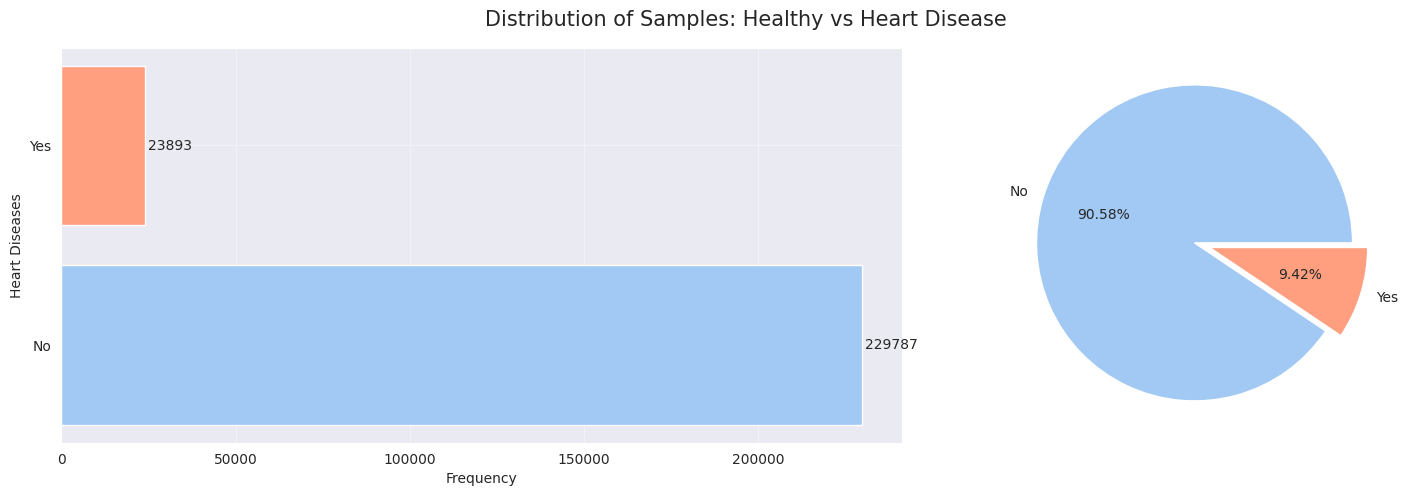

In [5]:
targets = data.HeartDiseaseorAttack.value_counts()
colors = ['#a1c9f4','#ff9f80']

figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
axes[0].barh(y=targets.index, width=targets.values, color=colors)
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Heart Diseases')
axes[0].set_yticks([0,1], ['No','Yes'])
axes[0].grid(alpha=0.4)

for index, values in enumerate(targets):
    axes[0].text(values+1000, index, str(values), va='center')

axes[1].pie(targets.values, labels=['No','Yes'], autopct='%.2f%%', explode=([0.05]*len(targets.index)), colors=colors)

figure.suptitle('Distribution of Samples: Healthy vs Heart Disease', fontsize=15)
plt.tight_layout(pad=1)
plt.savefig('pictures/label_distribution.jpg')
plt.show()

#### 3.1. Thuộc tính numeric

Phân phối của các thuộc tính numeric:

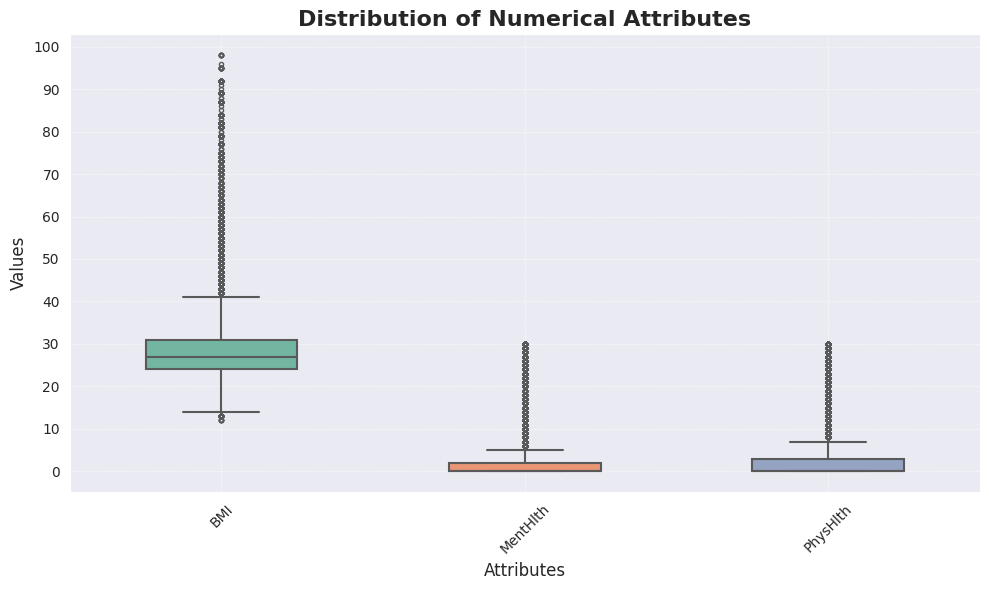

In [6]:
# dữ liệu cần chuyển về dạng long-form
numerical_attributes = ['BMI', 'MentHlth', 'PhysHlth']
df_melted = data[numerical_attributes].melt(var_name='Attribute', value_name='Value')

plt.figure(figsize=(10, 6))

sns.boxplot(x='Attribute', y='Value', data=df_melted, palette='Set2', width=0.5, linewidth=1.5, fliersize=3)

plt.title("Distribution of Numerical Attributes", fontsize=16, weight='bold')
plt.xlabel("Attributes", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(range(0, 101, 10),fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()

plt.savefig('pictures/numerical_attrs_distribution.jpg', dpi=300)

Correlation:

<Axes: >

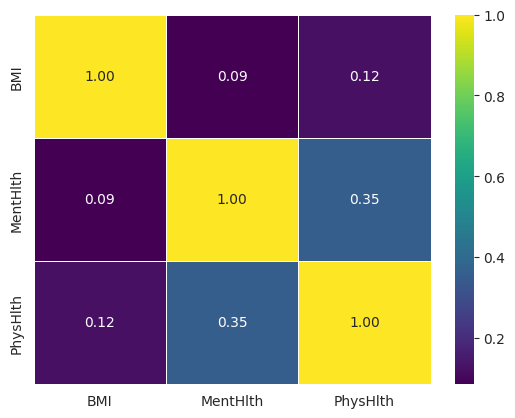

In [7]:
sns.heatmap(data.loc[:, numerical_attributes].corr(), annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
#plt.savefig('pictures/numeric_correlation.jpg', dpi=300)

Xem xét mối quan hệ giữa chỉ số BMI và nguy cơ mắc bệnh tim:

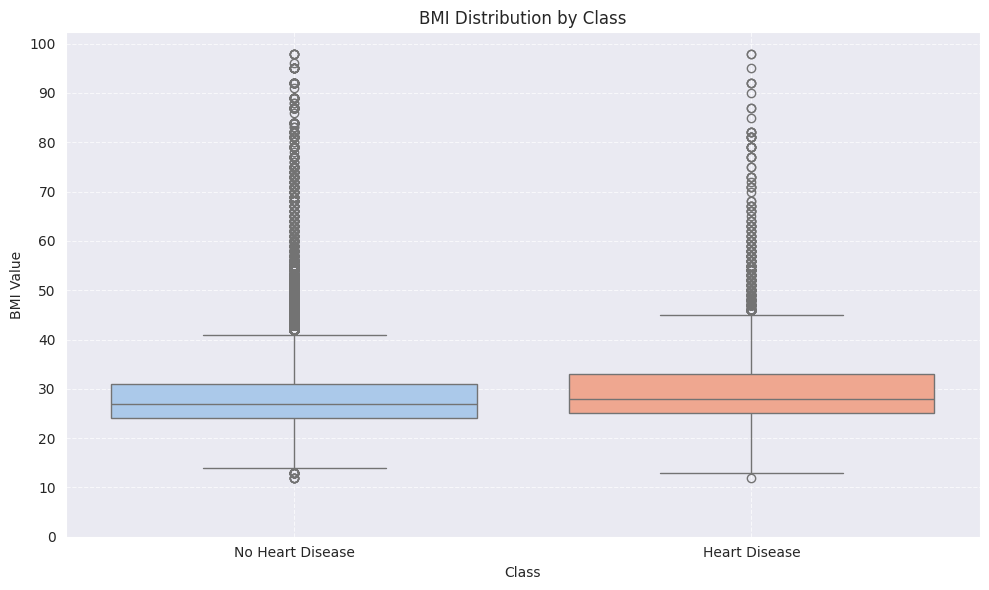

In [8]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='HeartDiseaseorAttack', y='BMI', data=data,
                    palette=['#a1c9f4','#ff9f80'])
plt.title('BMI Distribution by Class')
plt.xlabel('Class')
plt.ylabel('BMI Value')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'], fontsize=10)
plt.yticks(range(0, 101, 10))
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('pictures/BMI_distribution_by_class.jpg')

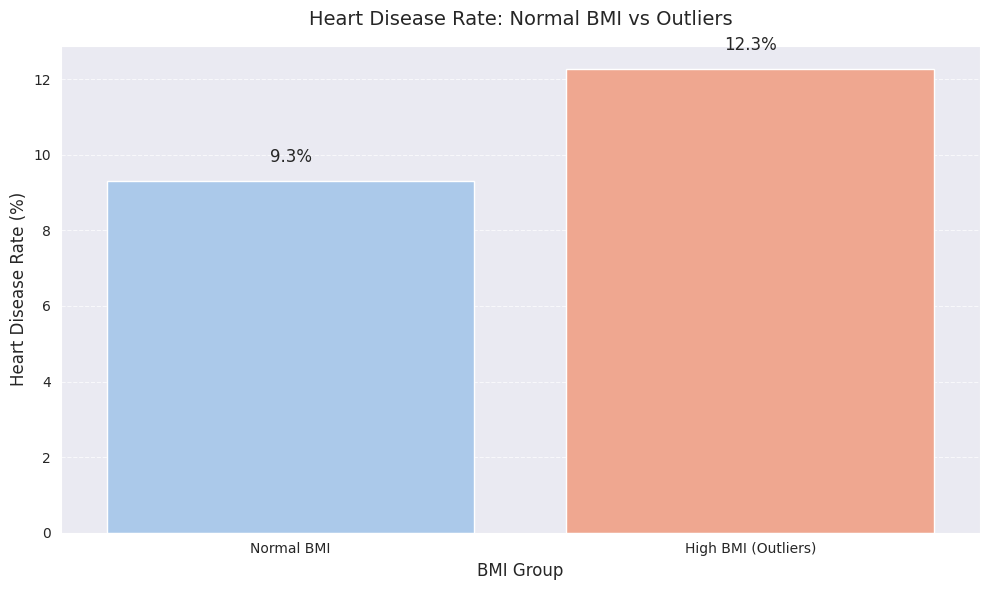

In [9]:
Q1 = data['BMI'].quantile(0.25)
Q3 = data['BMI'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

bmi_groups = pd.DataFrame({
    'Group': ['Normal BMI', 'High BMI (Outliers)'],
    'Heart Disease Rate (%)': [
        data[data['BMI'] <= upper_bound]['HeartDiseaseorAttack'].mean() * 100,
        data[data['BMI'] > upper_bound]['HeartDiseaseorAttack'].mean() * 100
    ]
})

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Group', y='Heart Disease Rate (%)', data=bmi_groups, 
                palette=['#a1c9f4','#ff9f80'])

plt.title('Heart Disease Rate: Normal BMI vs Outliers', fontsize=14, pad=15)
plt.xlabel('BMI Group', fontsize=12)
plt.ylabel('Heart Disease Rate (%)', fontsize=12)

# add percentages
for i, v in enumerate(bmi_groups['Heart Disease Rate (%)']):
    ax.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('pictures/heart_disease_rate_of_BMI_outliers.jpg')
plt.show()

Phân phối của các thuộc tính numeric theo từng class:

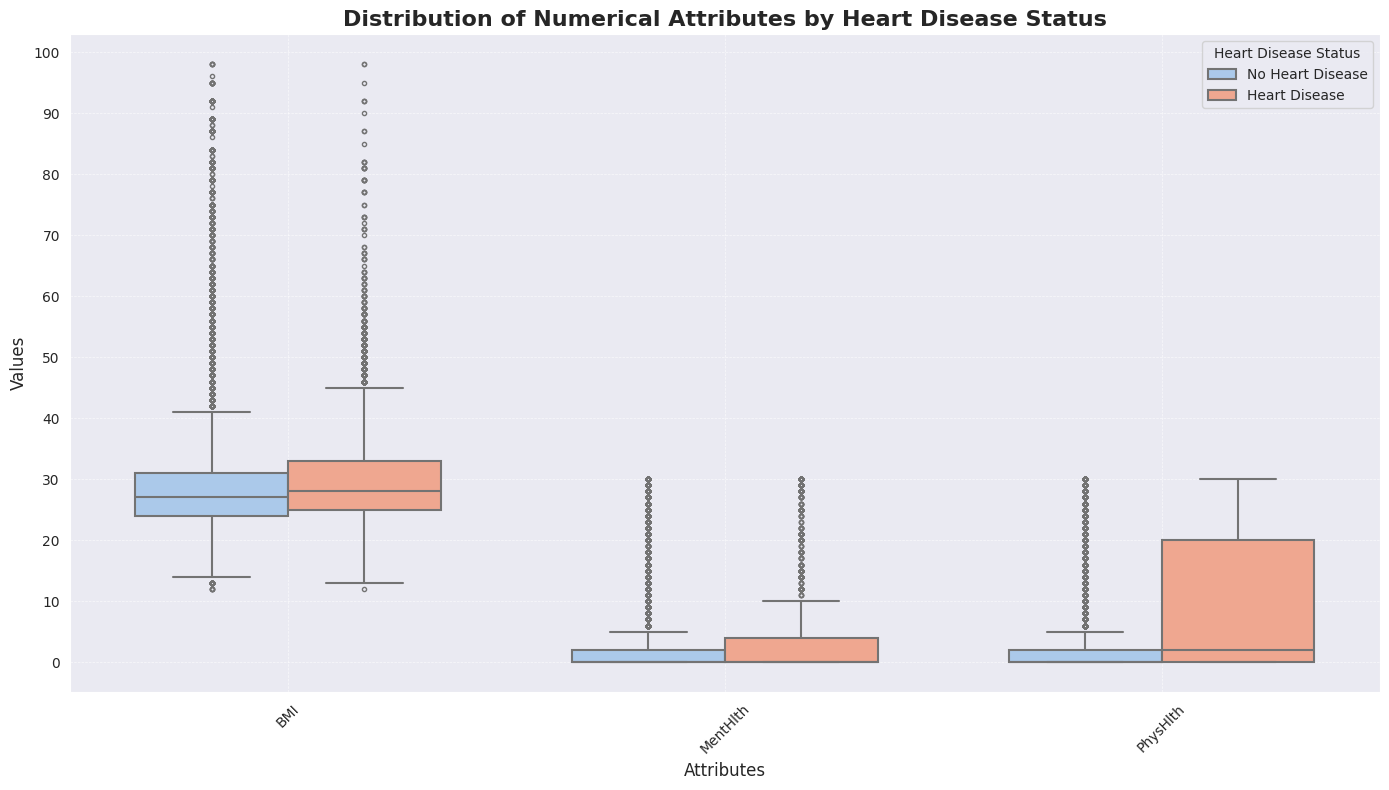

In [10]:
numerical_attributes = ['BMI', 'MentHlth', 'PhysHlth']
df_melted = pd.DataFrame()

for attr in numerical_attributes:
    temp = pd.DataFrame({
        'Attribute': attr,
        'Value': data[attr],
        'Class': data['HeartDiseaseorAttack'].map({0: 'No Heart Disease', 1: 'Heart Disease'})
    })
    df_melted = pd.concat([df_melted, temp])

plt.figure(figsize=(14, 8))
sns.boxplot(x='Attribute', y='Value', hue='Class', data=df_melted, 
            palette=['#a1c9f4','#ff9f80'], width=0.7, 
            linewidth=1.5, fliersize=3)
plt.title("Distribution of Numerical Attributes by Heart Disease Status", fontsize=16, weight='bold')
plt.xlabel("Attributes", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(range(0, 101, 10), fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(title='Heart Disease Status', fontsize=10)
plt.tight_layout()

plt.savefig('pictures/numerical_attrs_by_class_distribution.jpg', dpi=300)

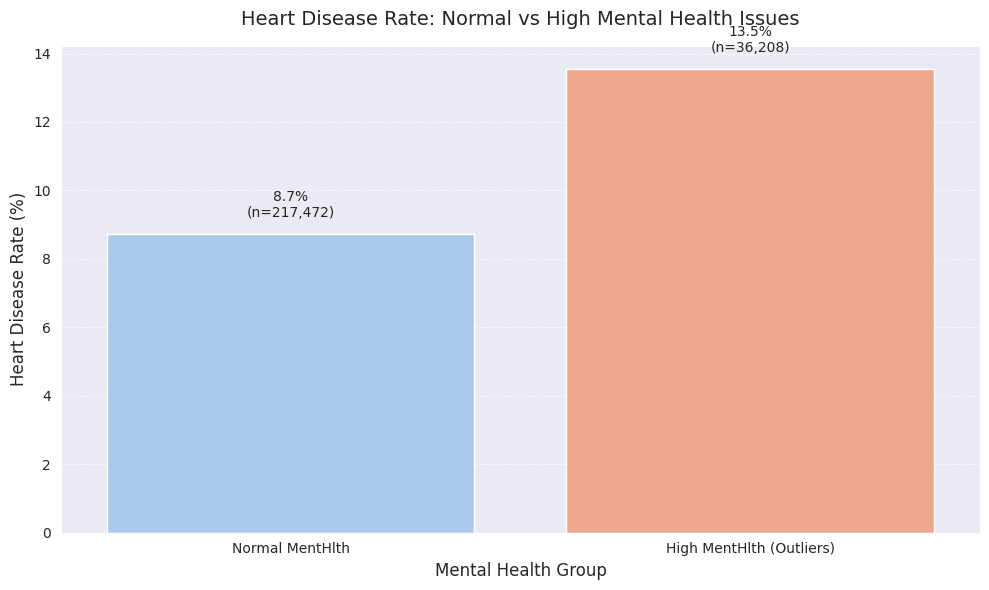

In [11]:
# Tính outliers cho MentHlth
Q1_ment = data['MentHlth'].quantile(0.25)
Q3_ment = data['MentHlth'].quantile(0.75)
IQR_ment = Q3_ment - Q1_ment
upper_bound_ment = Q3_ment + 1.5 * IQR_ment

menthlth_groups = pd.DataFrame({
    'Group': ['Normal MentHlth', 'High MentHlth (Outliers)'],
    'Sample Count': [
        len(data[data['MentHlth'] <= upper_bound_ment]),
        len(data[data['MentHlth'] > upper_bound_ment])
    ],
    'Heart Disease Rate (%)': [
        data[data['MentHlth'] <= upper_bound_ment]['HeartDiseaseorAttack'].mean() * 100,
        data[data['MentHlth'] > upper_bound_ment]['HeartDiseaseorAttack'].mean() * 100
    ]
})

# Visualize
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Group', y='Heart Disease Rate (%)', data=menthlth_groups, 
                palette=['#a1c9f4','#ff9f80'])

plt.title('Heart Disease Rate: Normal vs High Mental Health Issues', fontsize=14, pad=15)
plt.xlabel('Mental Health Group', fontsize=12)
plt.ylabel('Heart Disease Rate (%)', fontsize=12)

# Add percentages and sample counts
for i, v in enumerate(menthlth_groups['Heart Disease Rate (%)']):
    ax.text(i, v + 0.5, f'{v:.1f}%\n(n={menthlth_groups["Sample Count"][i]:,})', 
            ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('pictures/heart_disease_rate_of_MenthHlth_outliers.jpg')
plt.show()

**NHẬN XÉT**:
- Tỉ lệ mắc bệnh của nhóm outliers đều cao hơn so với nhóm bình thường
- Không có xu hướng cụ thể nào trong phân phối của BMI và MentHlth giữa các trường hợp có bệnh và không có bệnh
- Giá trị PhysHlth ở các trường hợp có bệnh có xu hướng cao hơn so với không có bệnh

#### 3.2. Thuộc tính category

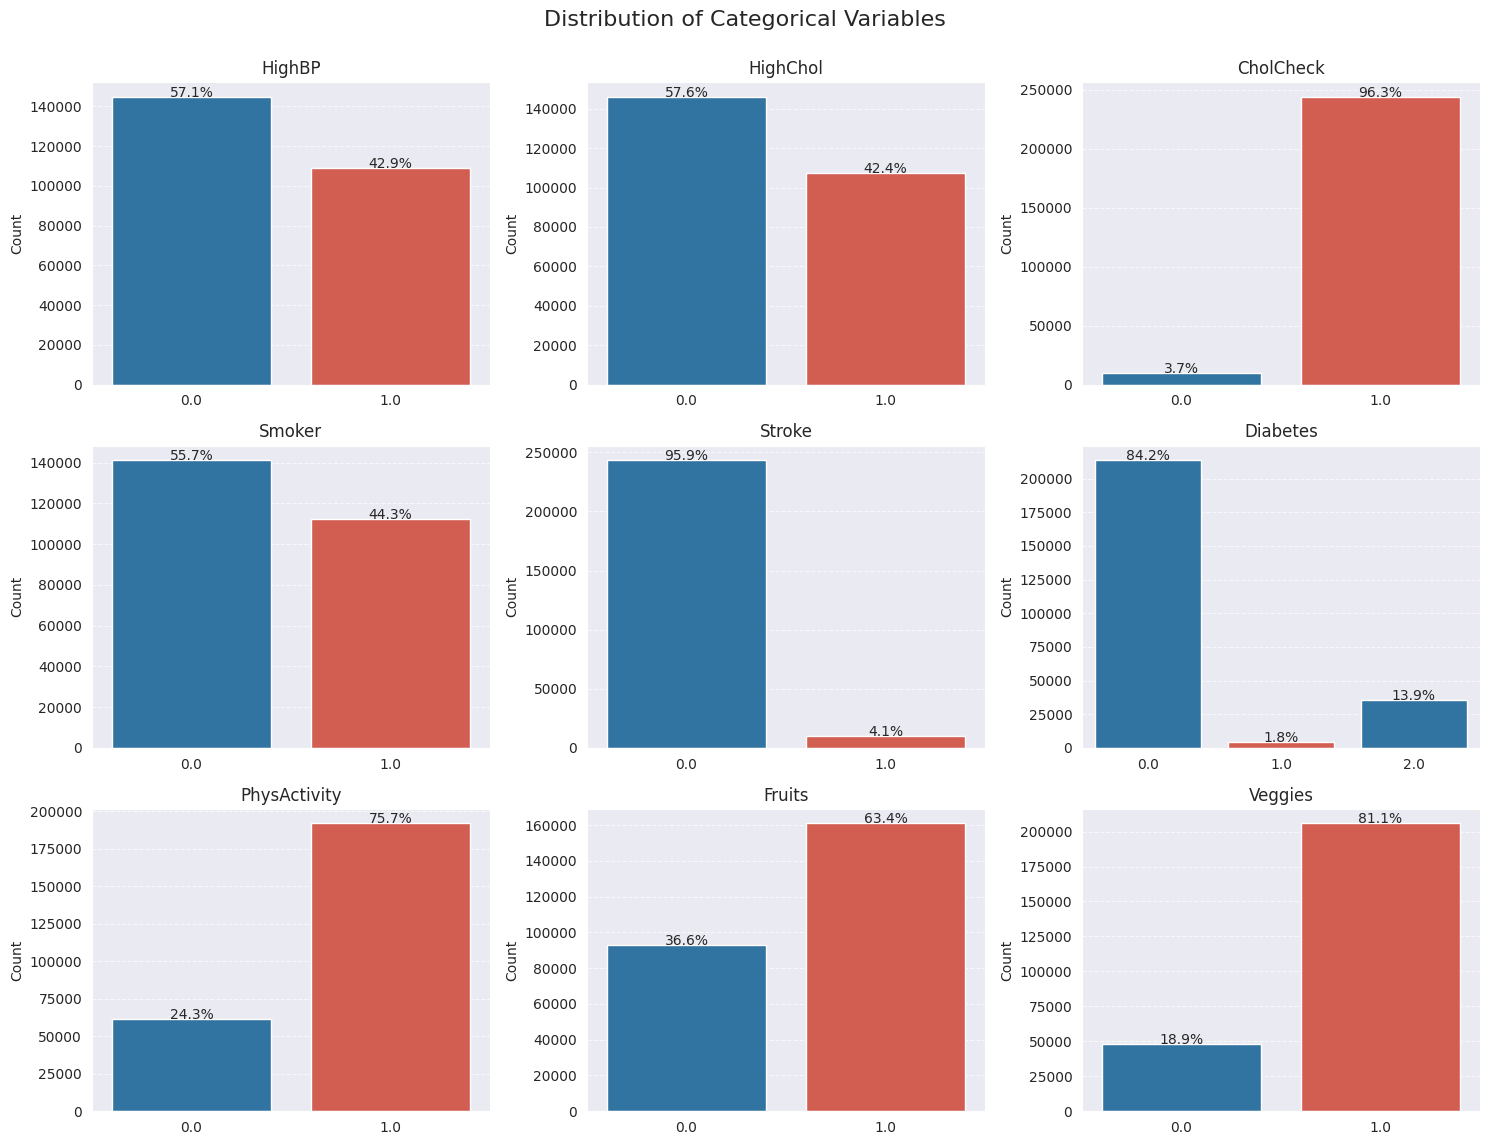

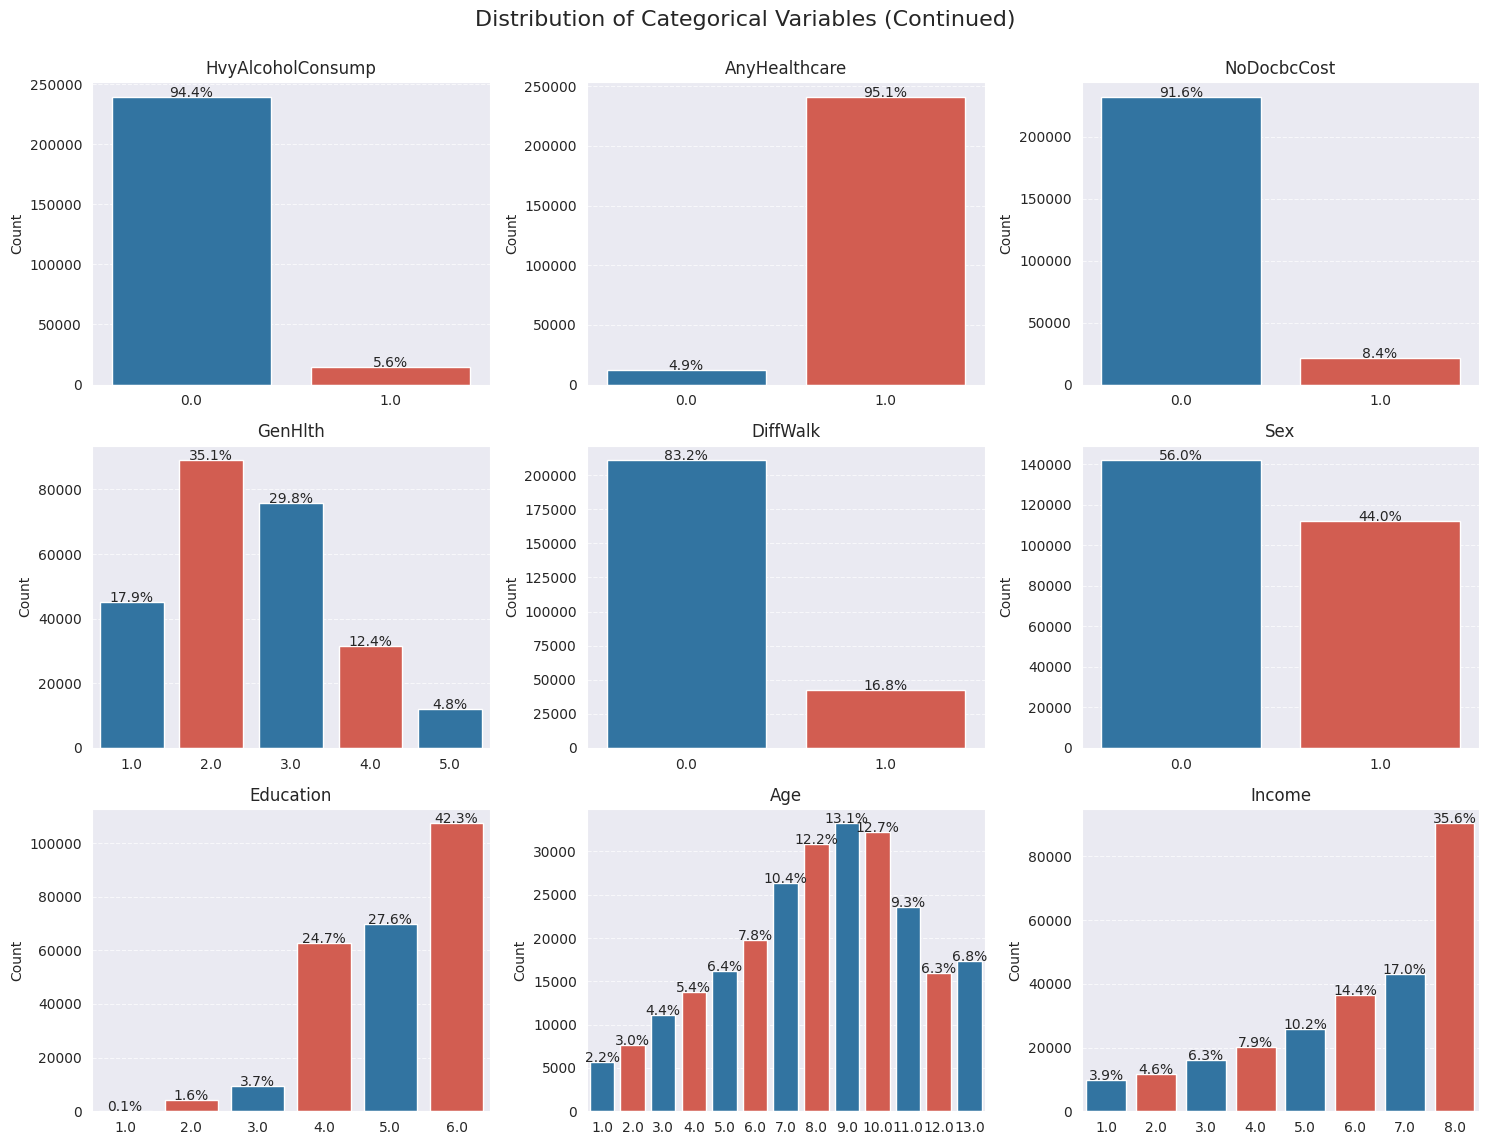

In [12]:
categorical_vars = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 
                   'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 
                   'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
                   'GenHlth', 'DiffWalk', 'Sex', 'Education', 'Age', 'Income']

plt.figure(figsize=(15, 12))
plt.suptitle("Distribution of Categorical Variables", fontsize=16, y=0.95)

for i, col in enumerate(categorical_vars[:9], 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=data, palette=['#1f77b4', '#e74c3c'])
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # add percentages
    total = len(data[col])
    for p in plt.gca().patches:
        height = p.get_height()
        plt.text(p.get_x() + p.get_width()/2., height + 0.1,
                f'{height/total:.1%}', ha="center")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('pictures/categorical_distributions_1.jpg', dpi=300)
plt.show()

# for multinomial
if len(categorical_vars) > 9:
    plt.figure(figsize=(15, 12))
    plt.suptitle("Distribution of Categorical Variables (Continued)", fontsize=16, y=0.95)
    
    for i, col in enumerate(categorical_vars[9:], 1):
        plt.subplot(3, 3, i)
        sns.countplot(x=col, data=data, palette=['#1f77b4', '#e74c3c'])
        plt.title(col)
        plt.xlabel('')
        plt.ylabel('Count')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        
        # add percentages
        total = len(data[col])
        for p in plt.gca().patches:
            height = p.get_height()
            plt.text(p.get_x() + p.get_width()/2., height + 0.1,
                    f'{height/total:.1%}', ha="center")
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig('pictures/categorical_distributions_2.jpg', dpi=300)
    plt.show()

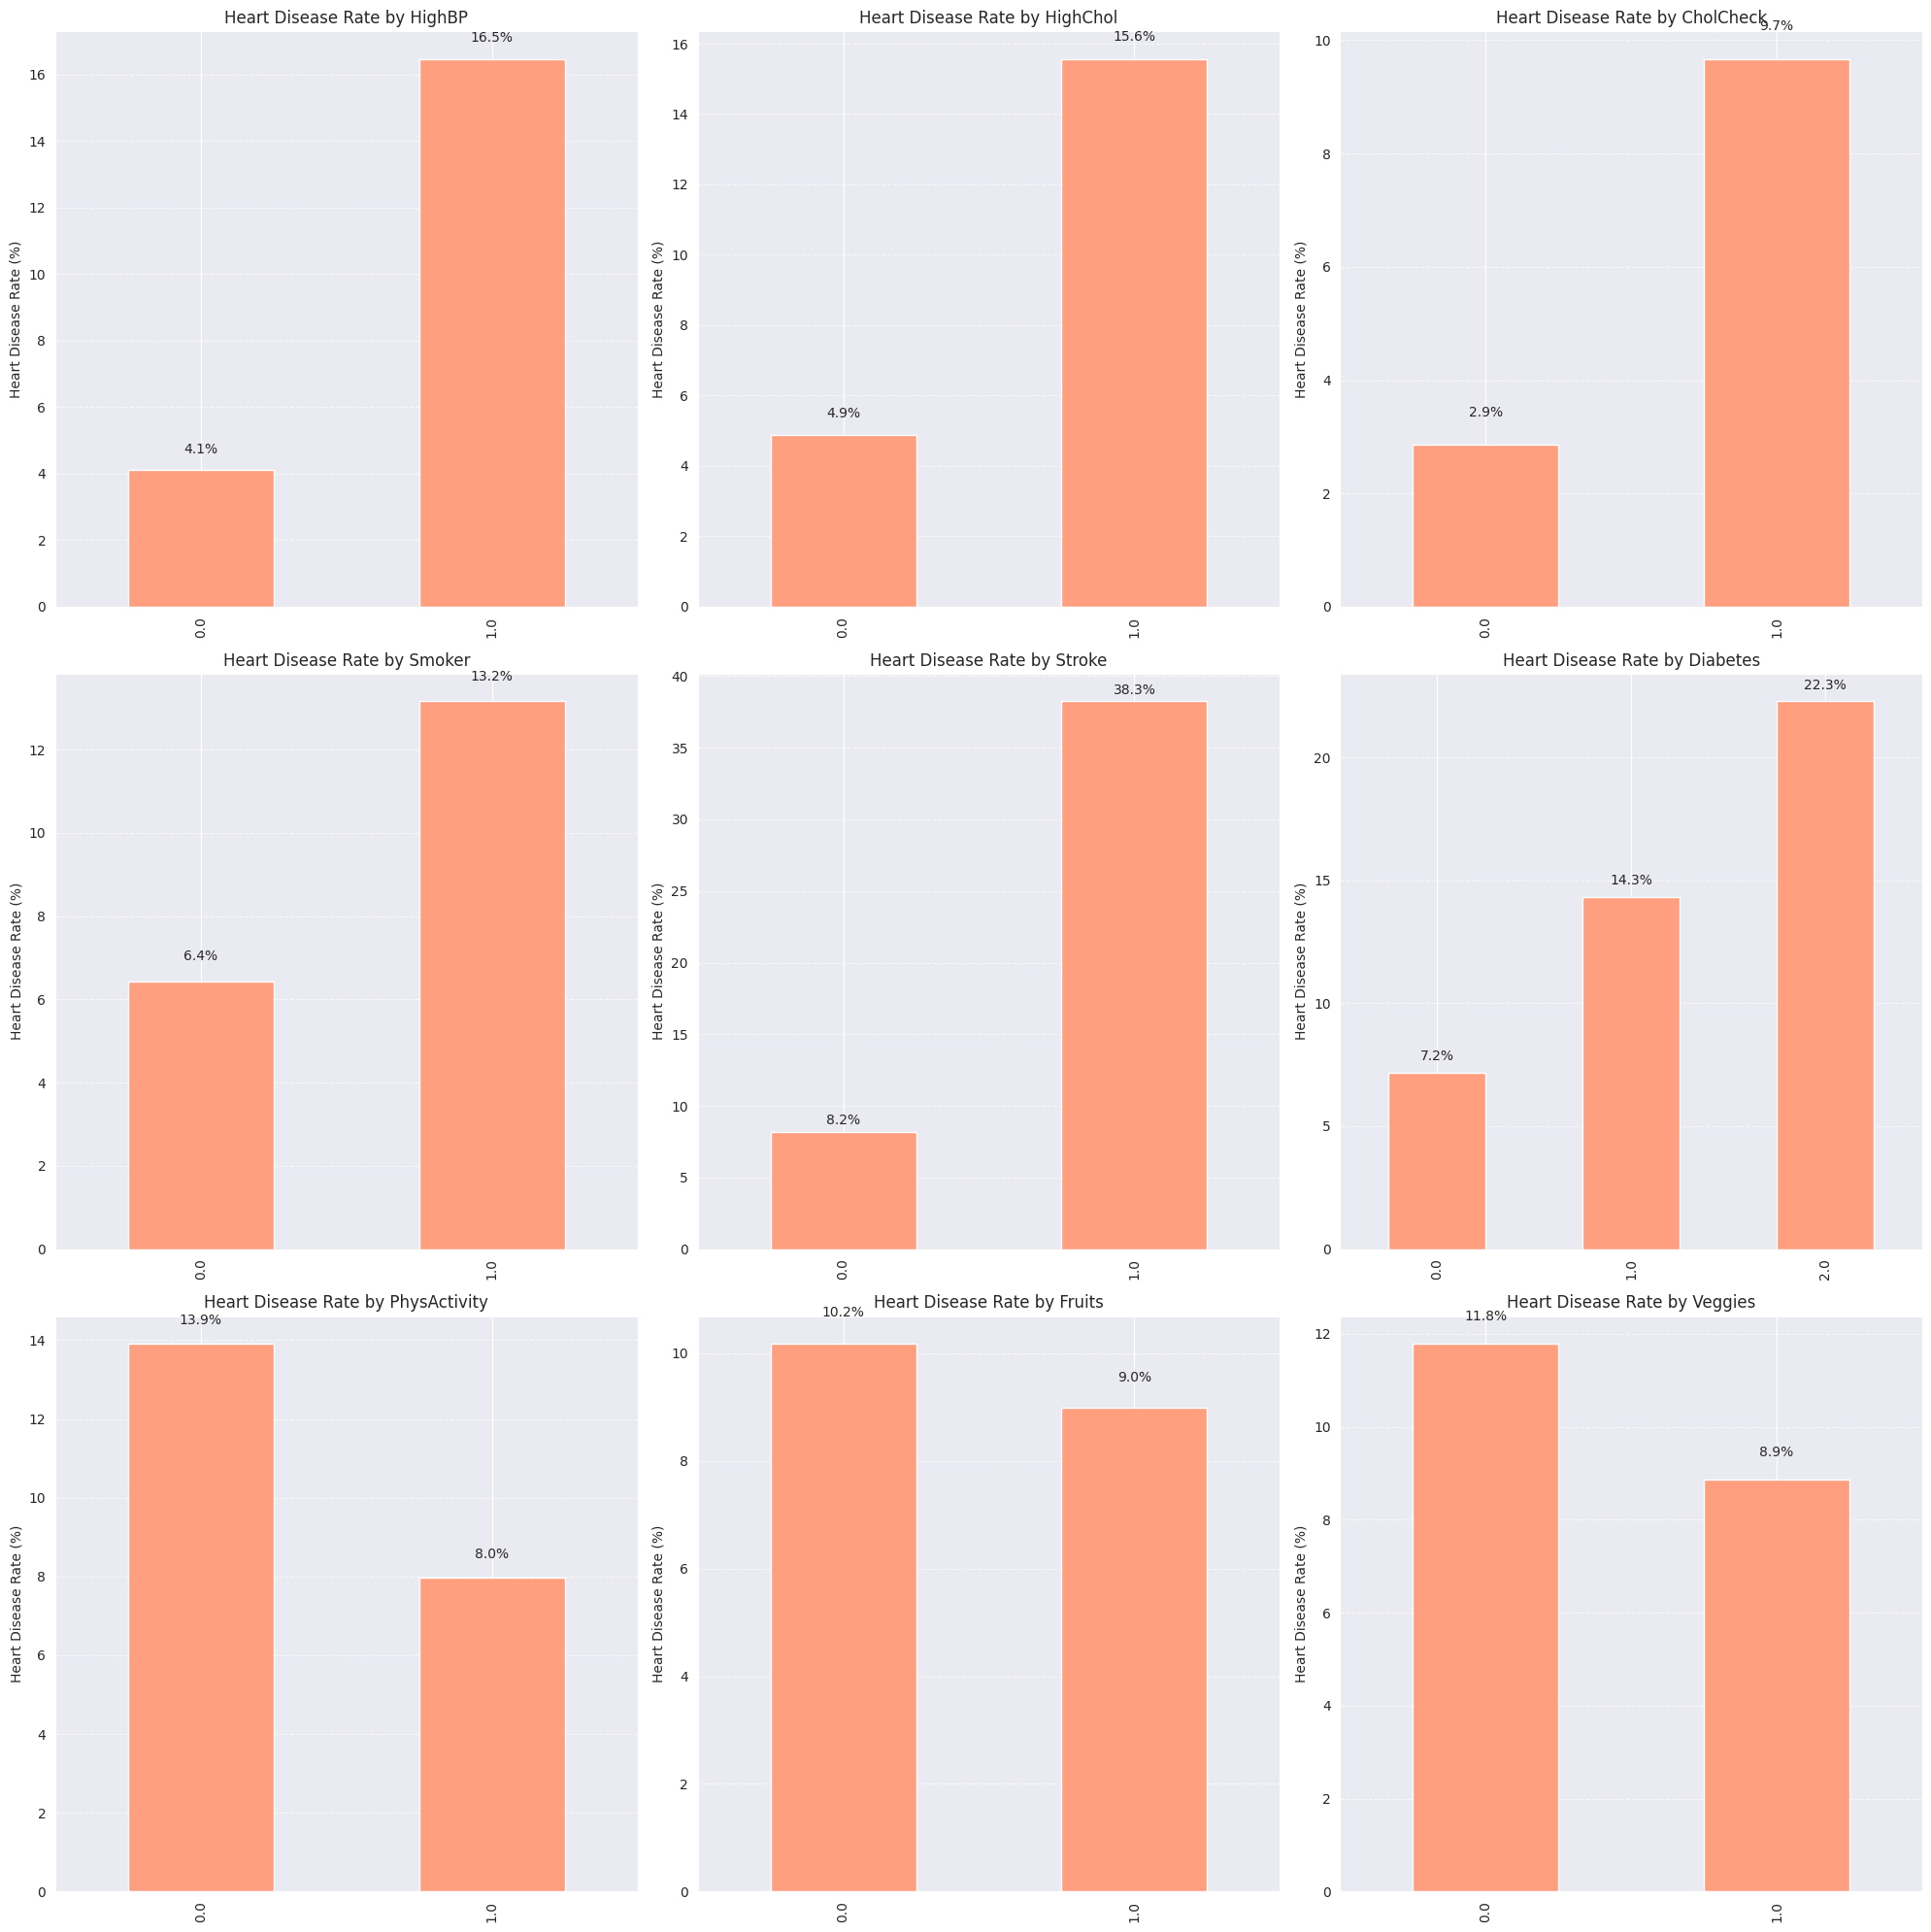

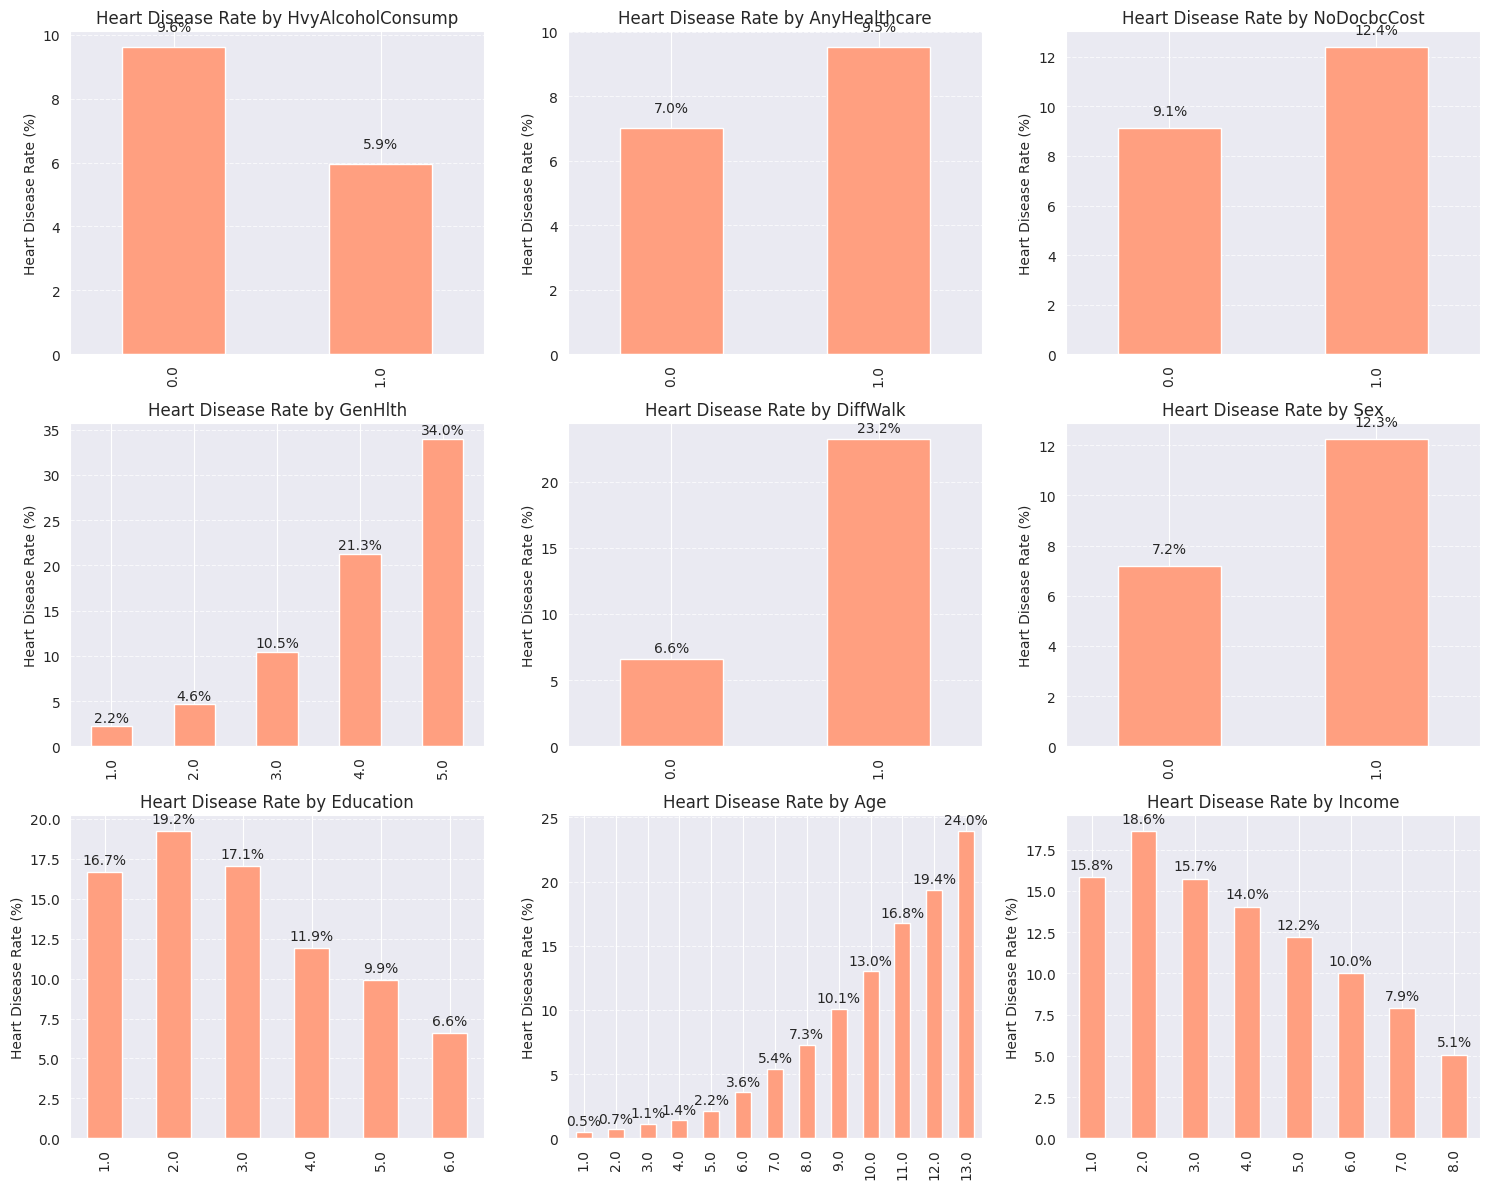

In [13]:
def plot_heart_disease_rate(variable, ax):
    cross_tab = pd.crosstab(data[variable], data['HeartDiseaseorAttack'])
    disease_rate = cross_tab[1] / (cross_tab[0] + cross_tab[1]) * 100
    
    disease_rate.plot(kind='bar', color='#ff9f80', ax=ax)
    ax.set_title(f'Heart Disease Rate by {variable}')
    ax.set_ylabel('Heart Disease Rate (%)')
    ax.set_xlabel('')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # add percentages
    for i, v in enumerate(disease_rate):
        ax.text(i, v + 0.5, f"{v:.1f}%", ha='center')

fig, axes = plt.subplots(3, 3, figsize=(20, 20))
axes = axes.flatten()

# first 9 attributes
for i, col in enumerate(categorical_vars[:9]):
    plot_heart_disease_rate(col, axes[i])

plt.tight_layout()
plt.savefig('pictures/heart_disease_rate_by_category_1.jpg', dpi=300)
plt.show()

# for multinomial
if len(categorical_vars) > 9:
    remaining_vars = categorical_vars[9:]
    rows = (len(remaining_vars) + 2) // 3  
    
    fig, axes = plt.subplots(rows, 3, figsize=(15, rows*4))
    axes = axes.flatten()
    
    for i, col in enumerate(remaining_vars):
        plot_heart_disease_rate(col, axes[i])
    
    for j in range(len(remaining_vars), len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.savefig('pictures/heart_disease_rate_by_category_2.jpg', dpi=300)
    plt.show()

**NHẬN XÉT:**
- Các thói quen có lợi đều làm giảm nguy cơ mắc bệnh tim, đối với các thói quen có hại thì ngược lại
- Tỉ lệ mắc bệnh tim của nam giới thường cao hơn nữ giới
- Tỉ lệ mắc bệnh tim ở những người có trình độ giáo dục và thu nhập thấp thường cao hơn so với phần còn lại
- Ngoài ra, tỉ lệ mắc bệnh tim còn tăng theo tuổi tác

Correlation (Cramer's V) giữa các thuộc tính category:

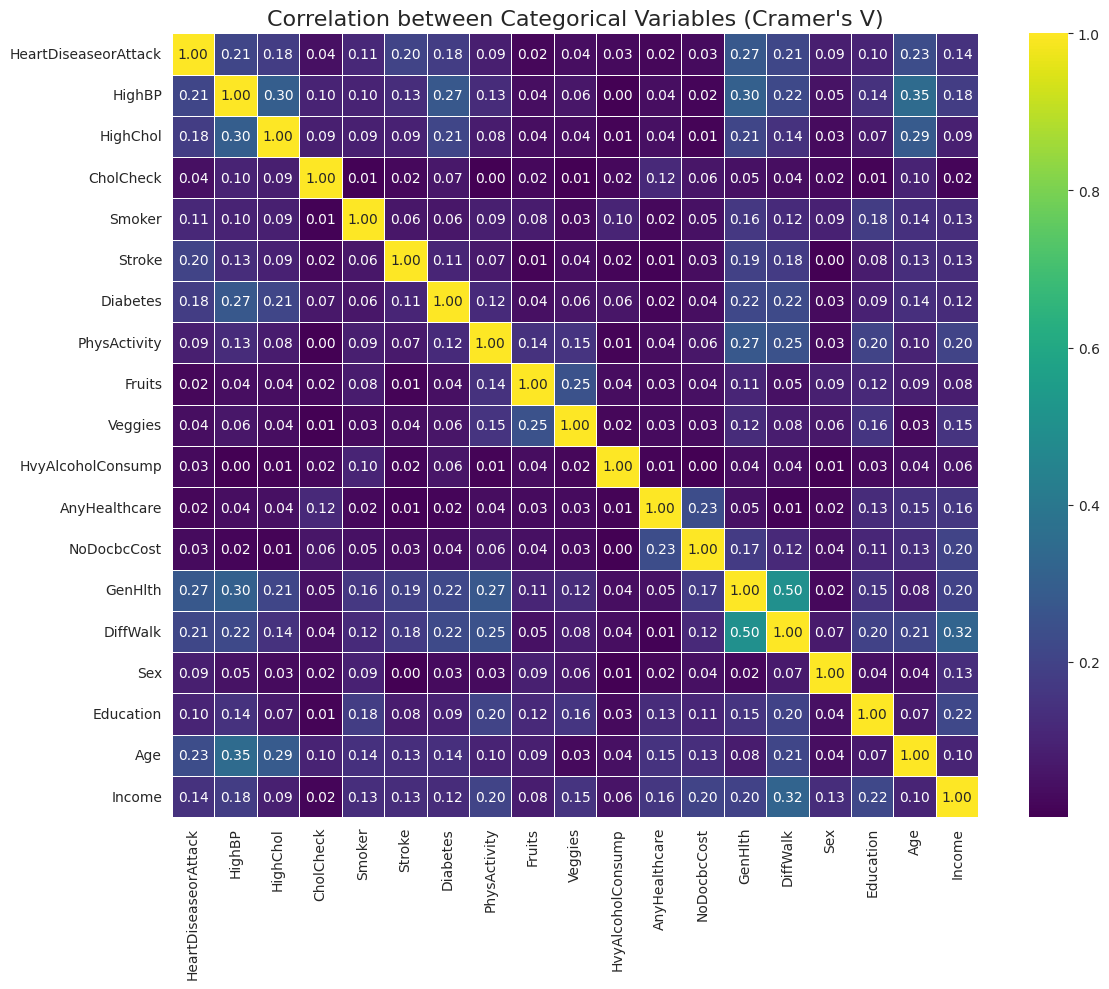

In [14]:
# Thực hiện kiểm định Chi-square và tính Cramer's V
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1), (rcorr-1)))

# Tính ma trận tương quan Cramer's V
categorical_vars = ['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 
                   'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 
                   'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
                   'GenHlth', 'DiffWalk', 'Sex', 'Education', 'Age', 'Income']
cat_corr = pd.DataFrame(data, columns=categorical_vars)

for i in categorical_vars:
    for j in categorical_vars:
        cat_corr.loc[i, j] = cramers_v(data[i], data[j])

# correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cat_corr.loc[categorical_vars, categorical_vars], annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlation between Categorical Variables (Cramer\'s V)', fontsize=16)
plt.tight_layout()
plt.savefig('pictures/categorical_correlation.jpg', dpi=300)
plt.show()

Mối quan hệ giữa thuộc tính numeric và category:

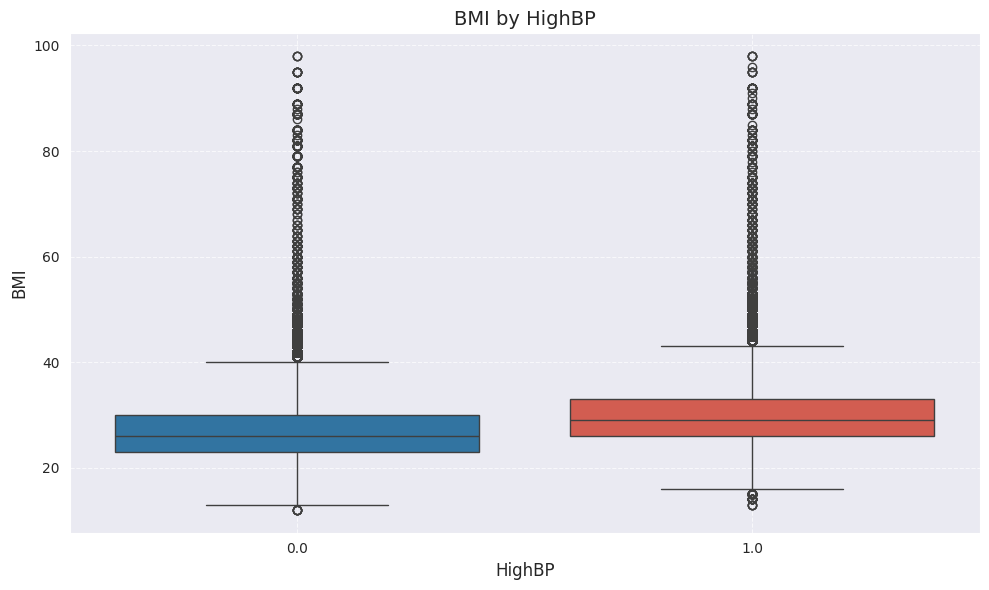

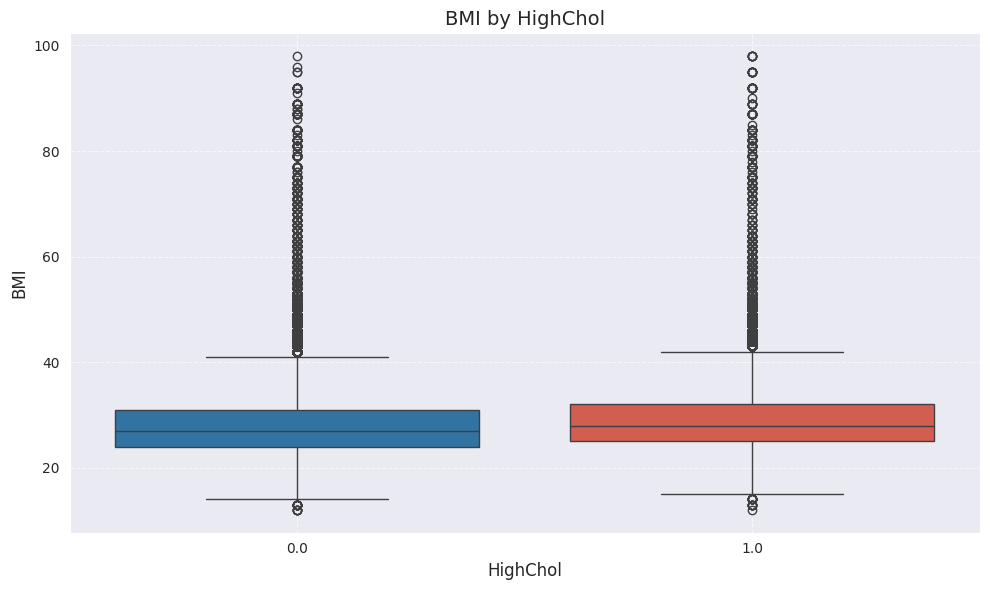

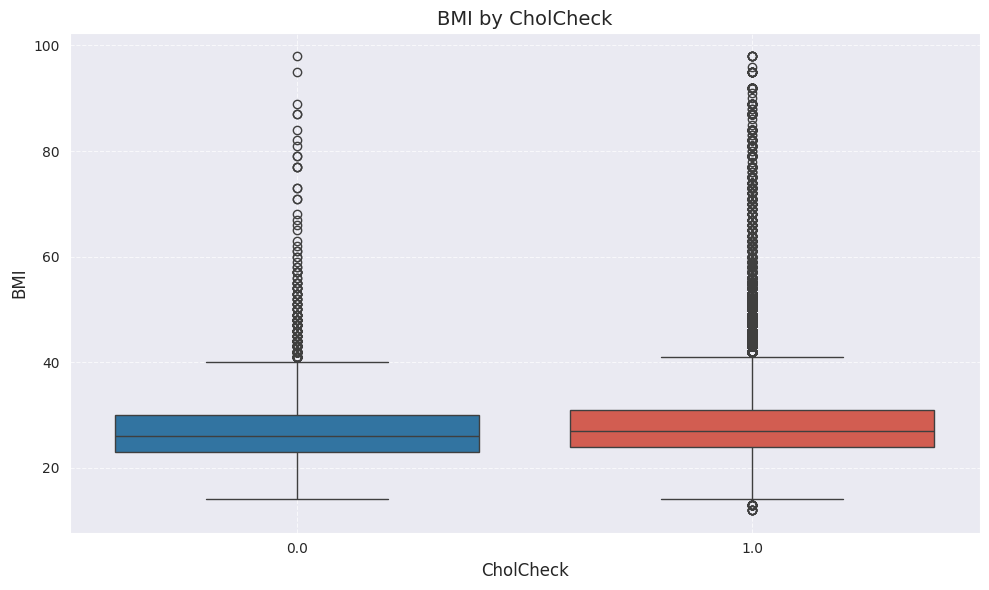

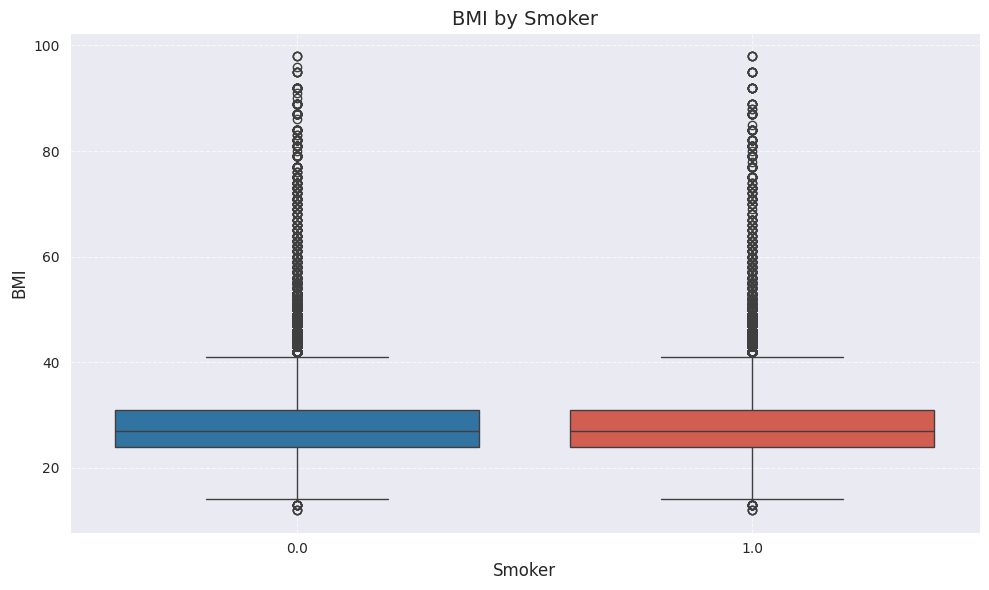

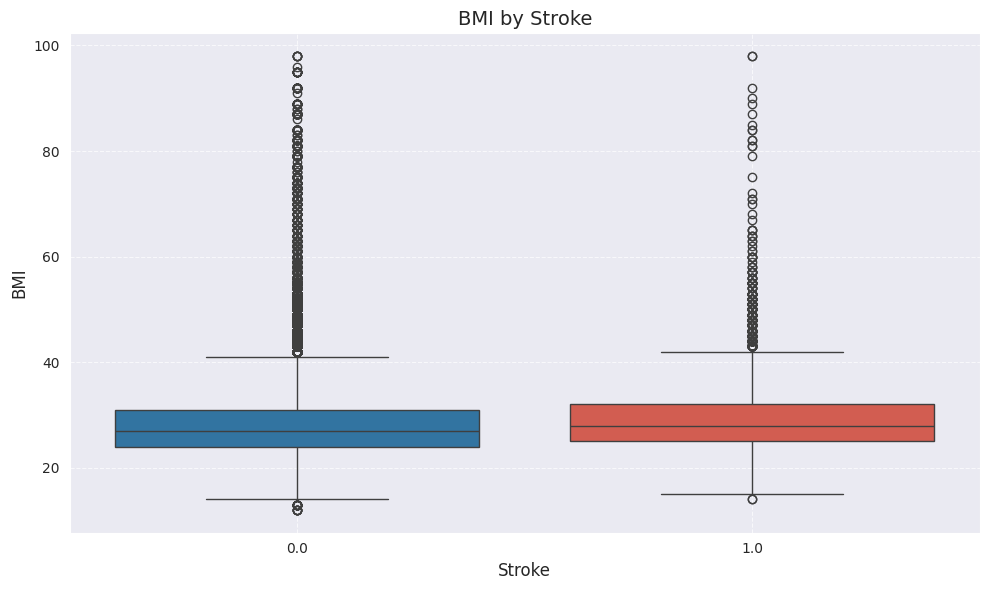

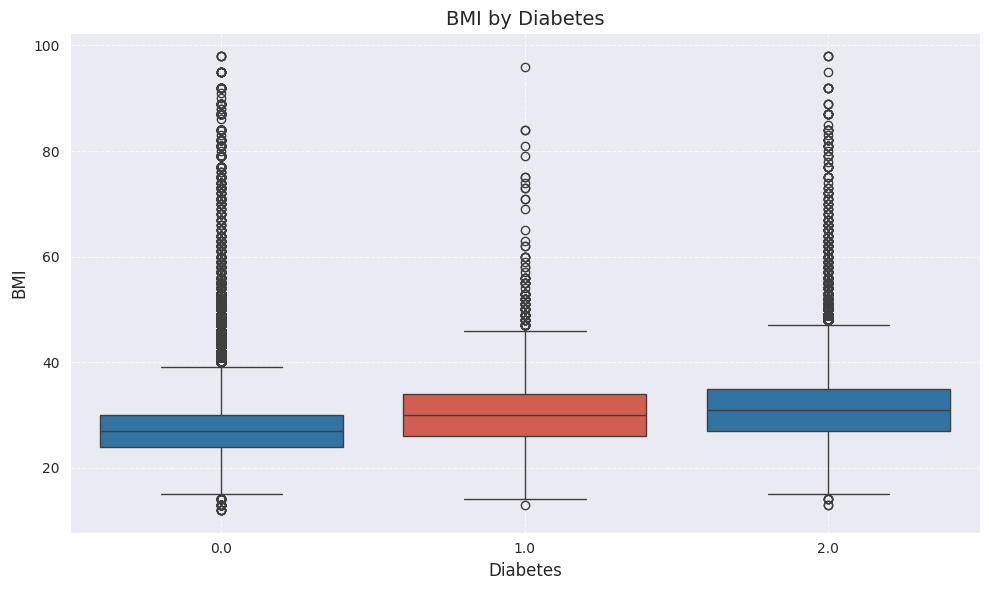

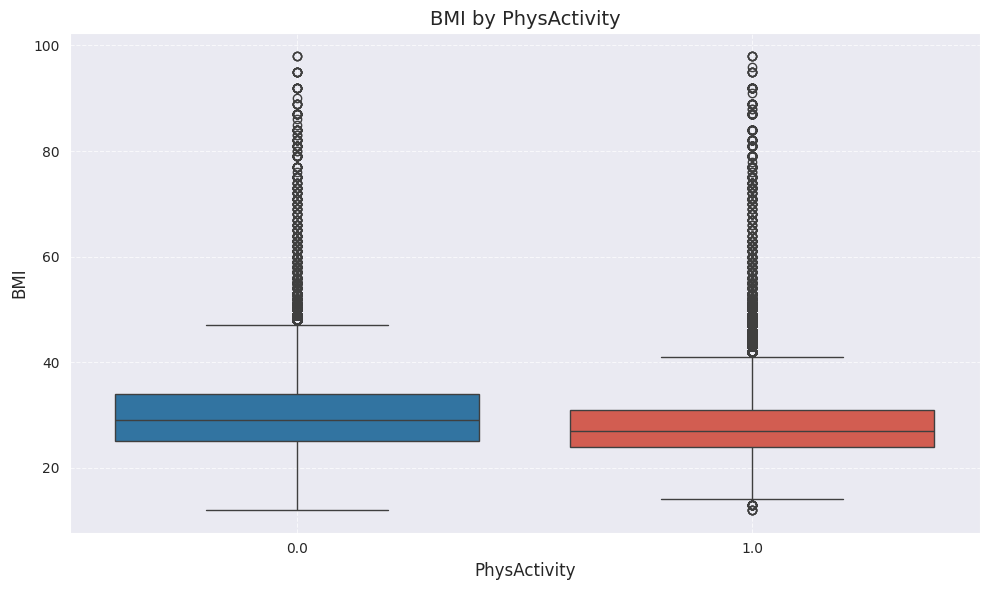

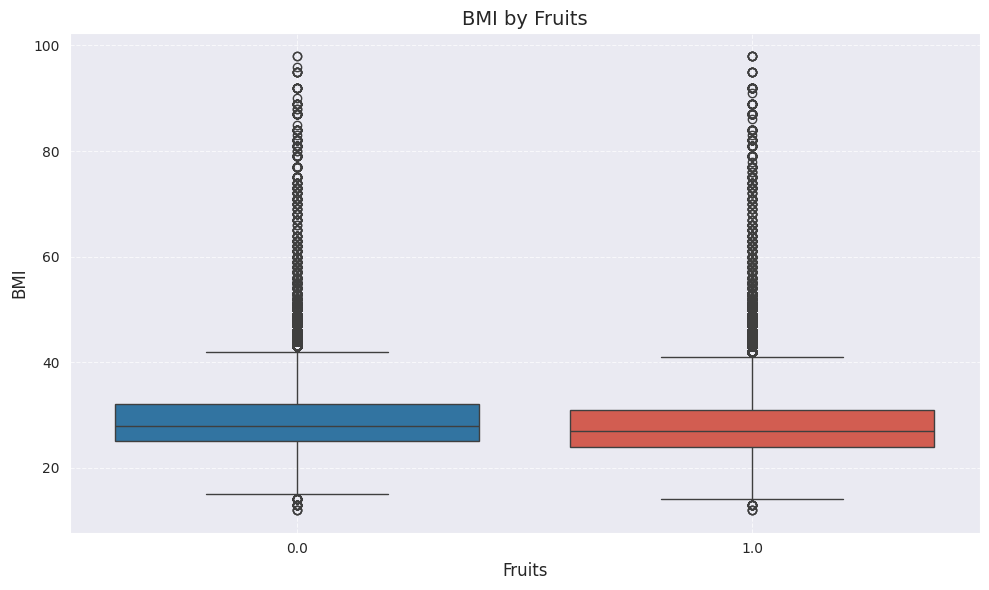

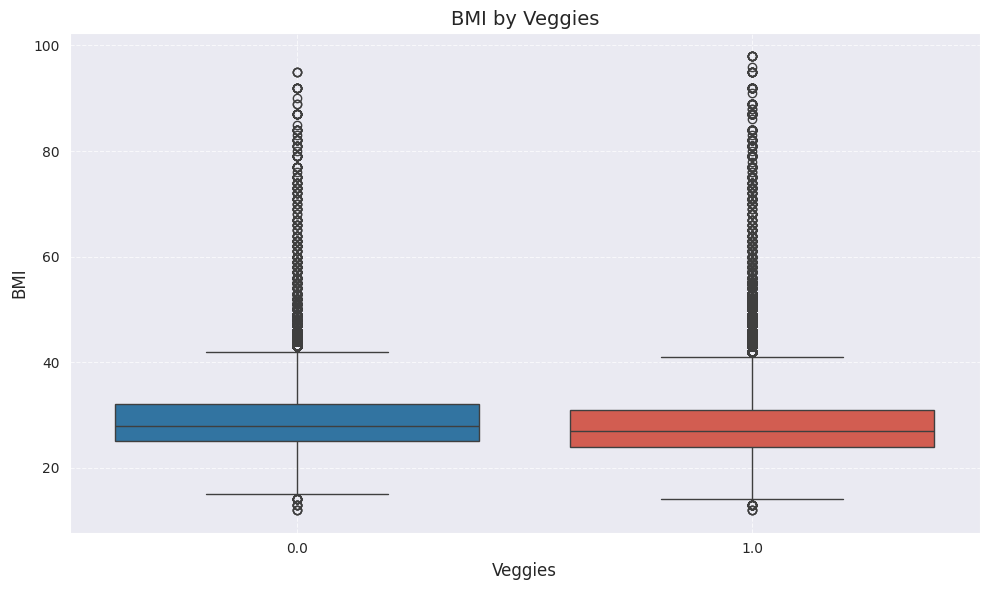

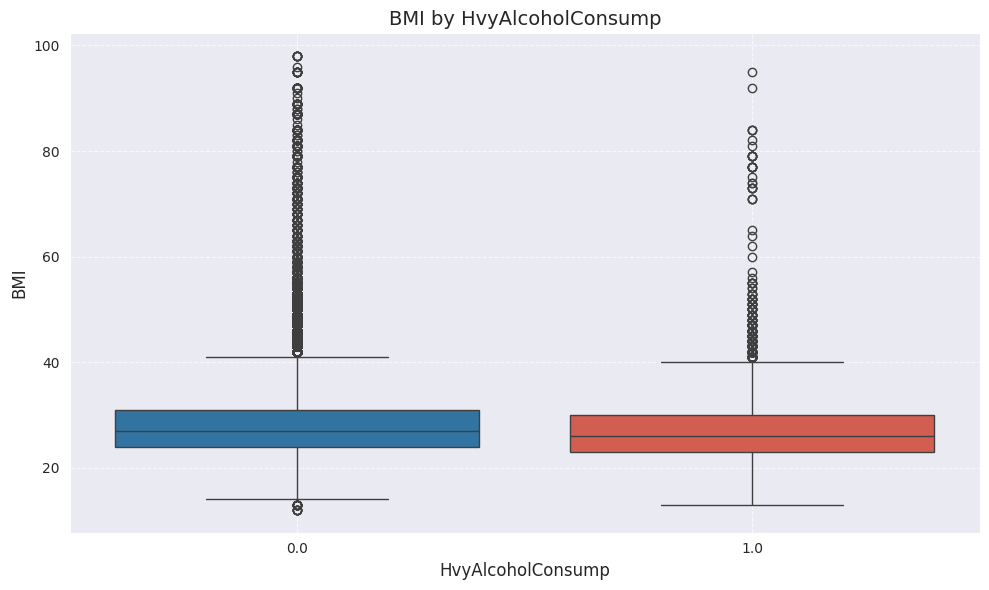

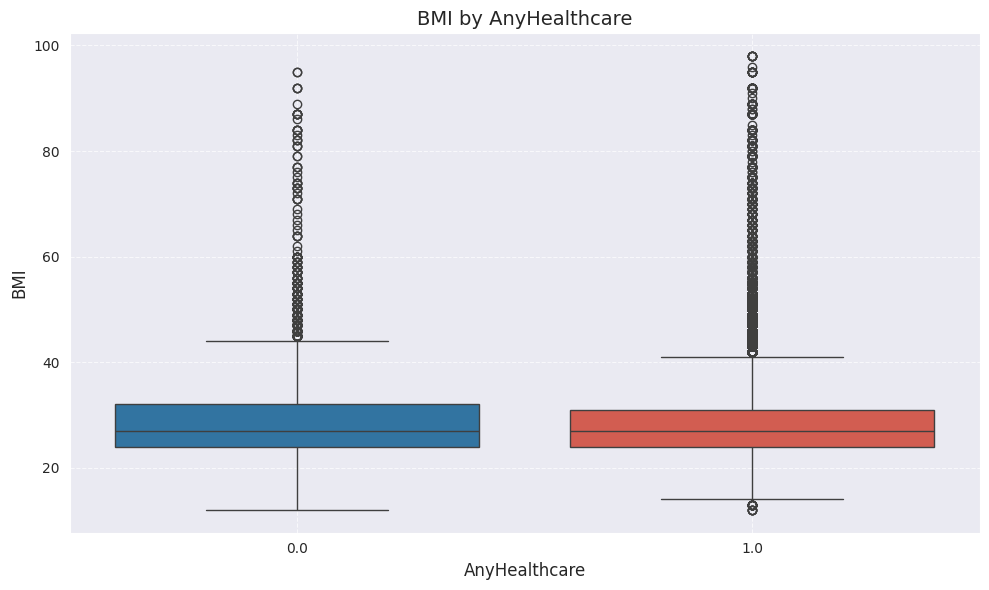

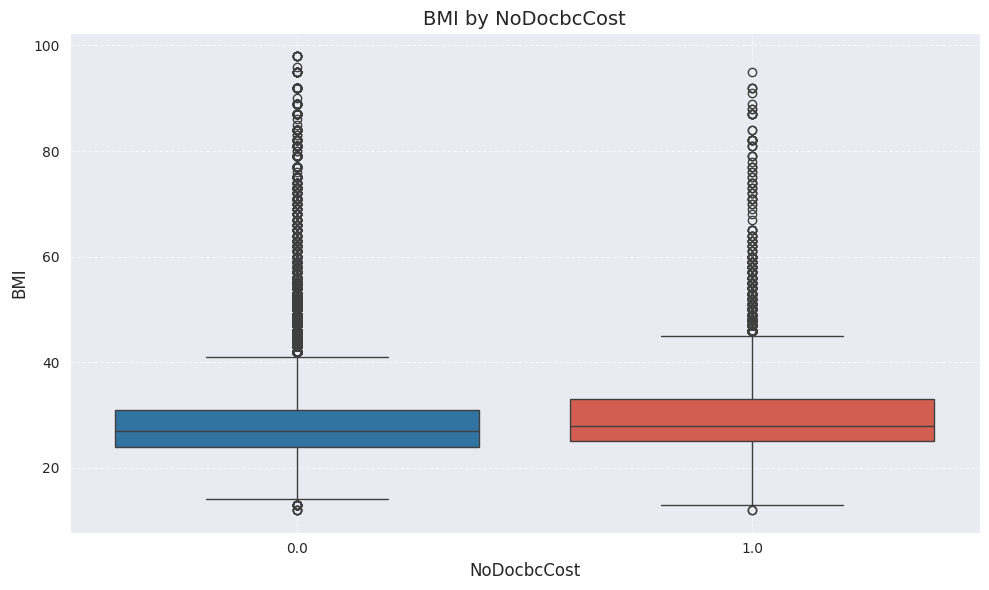

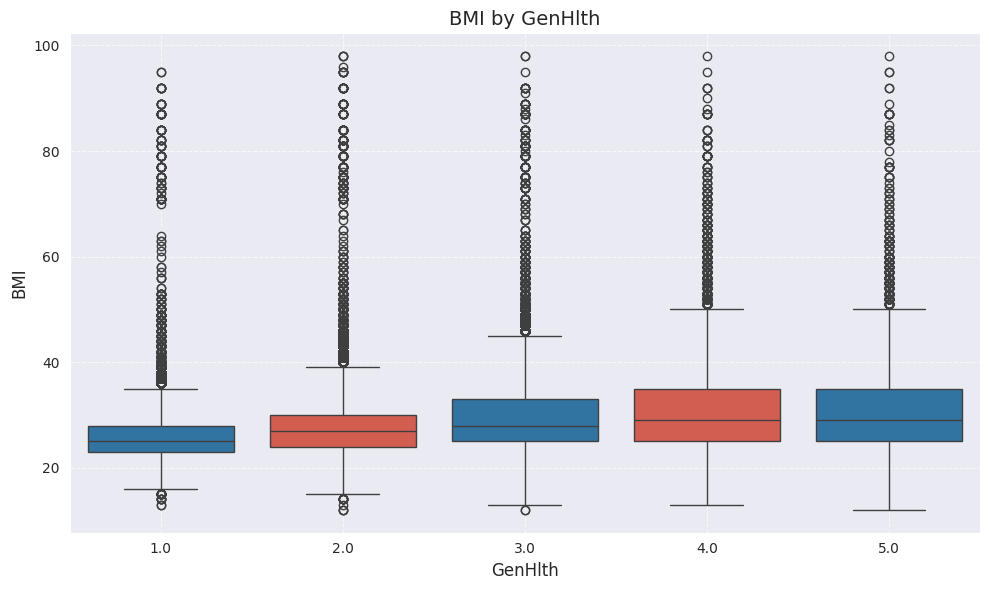

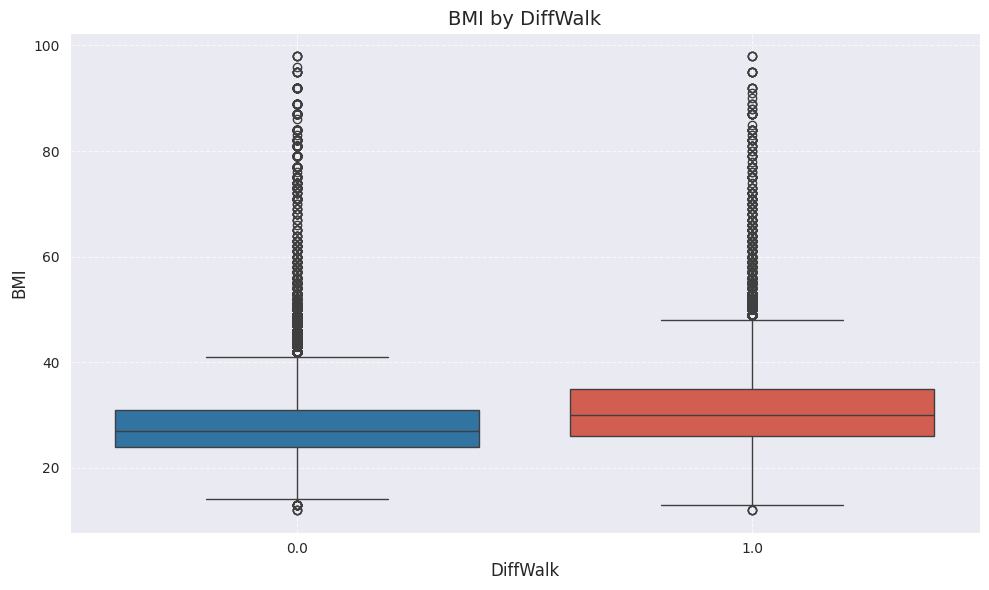

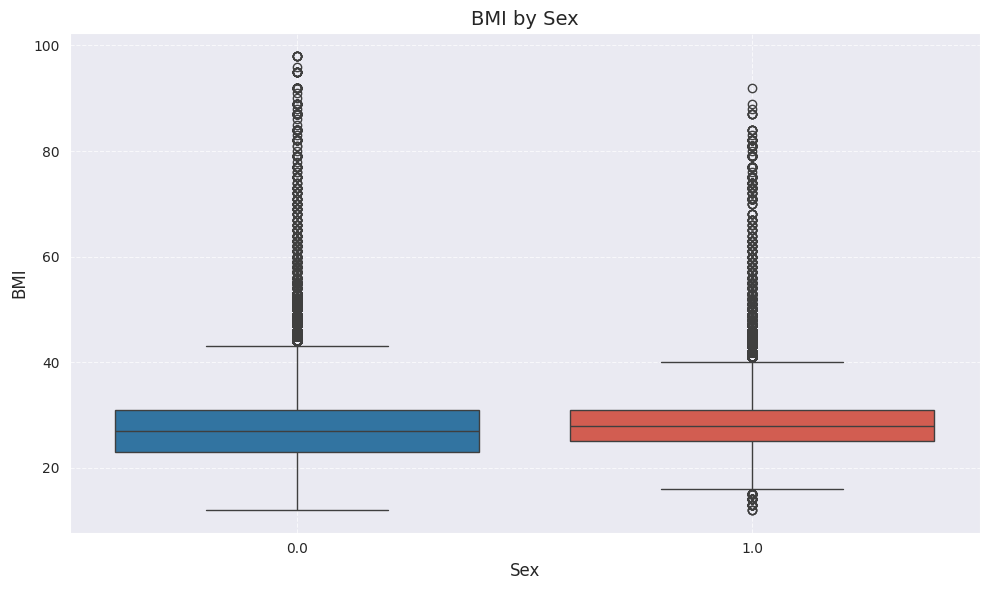

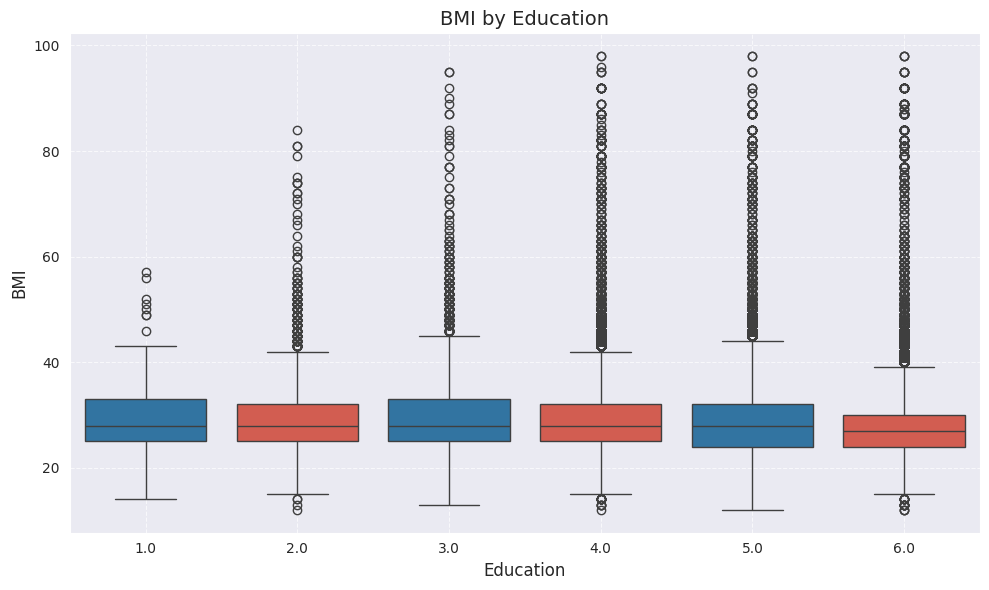

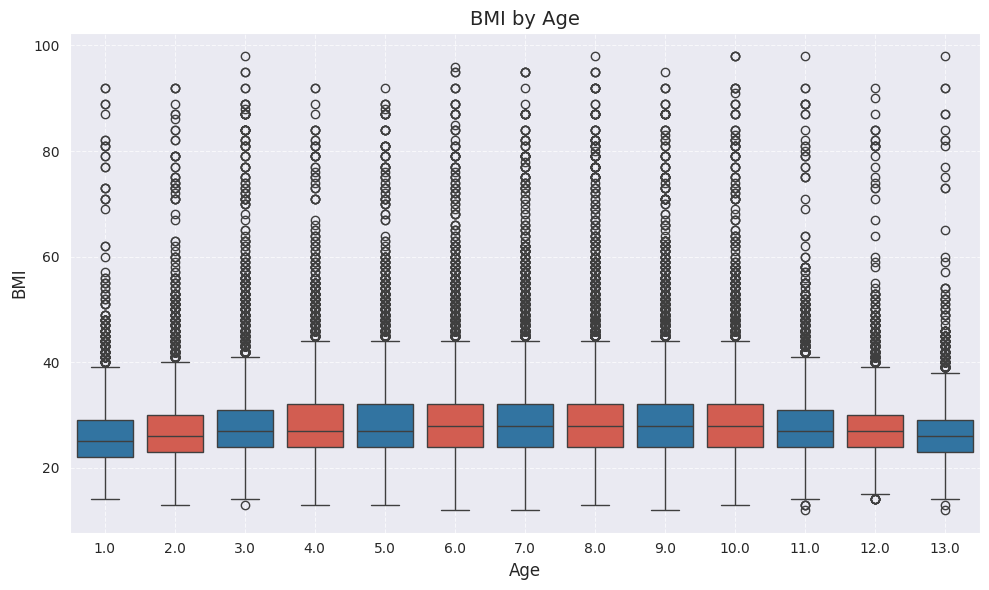

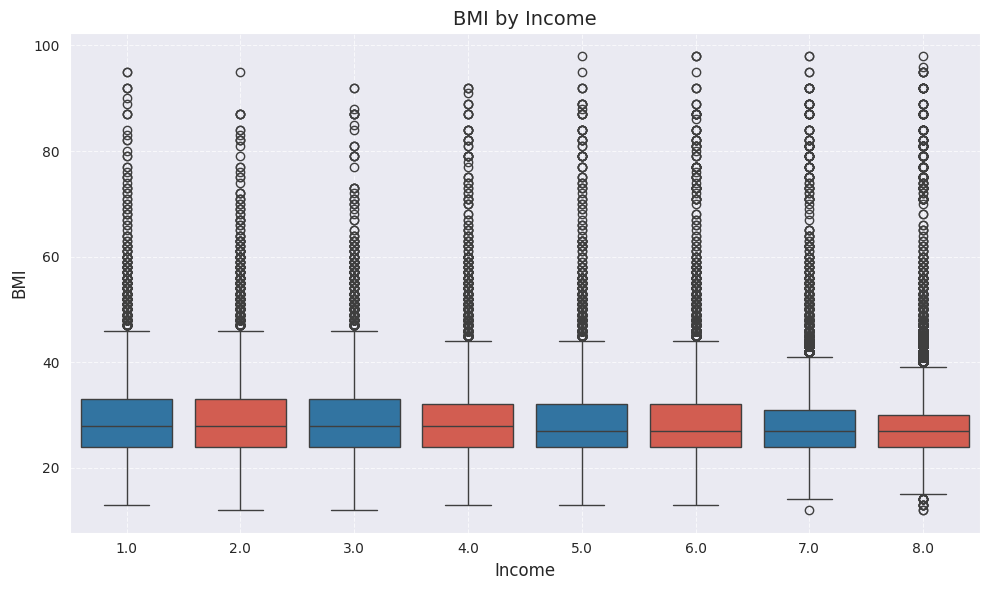

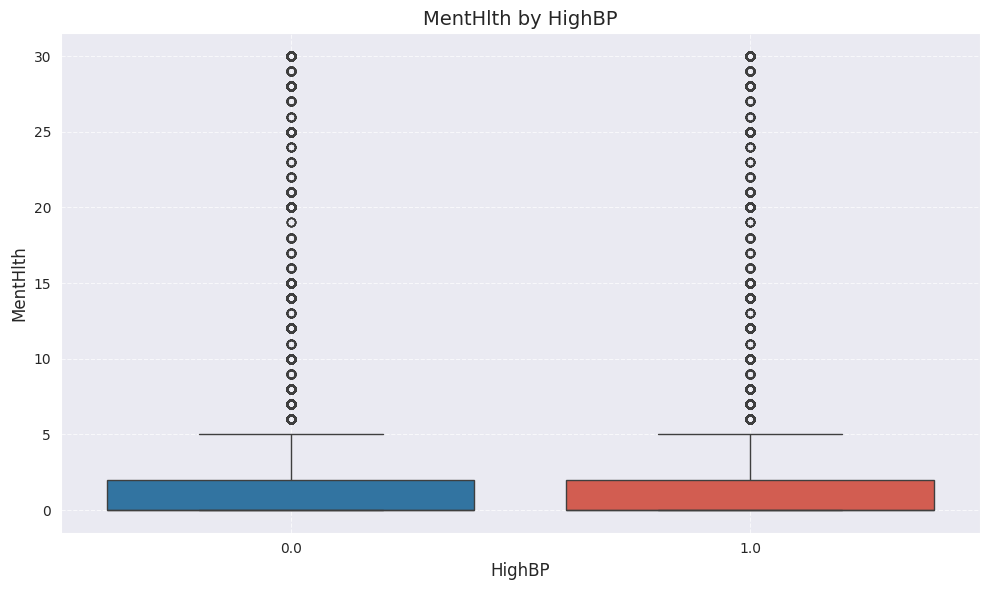

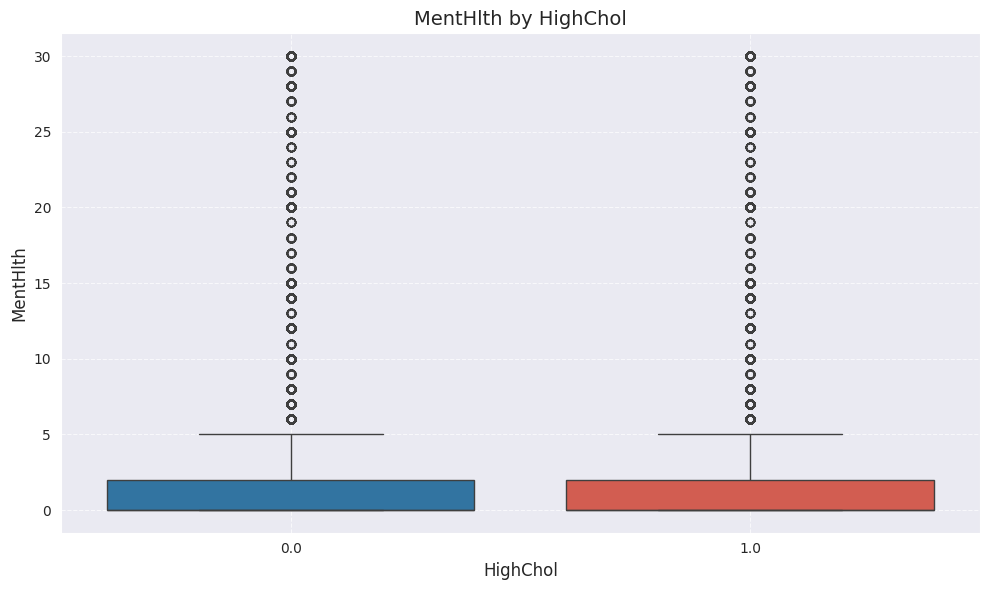

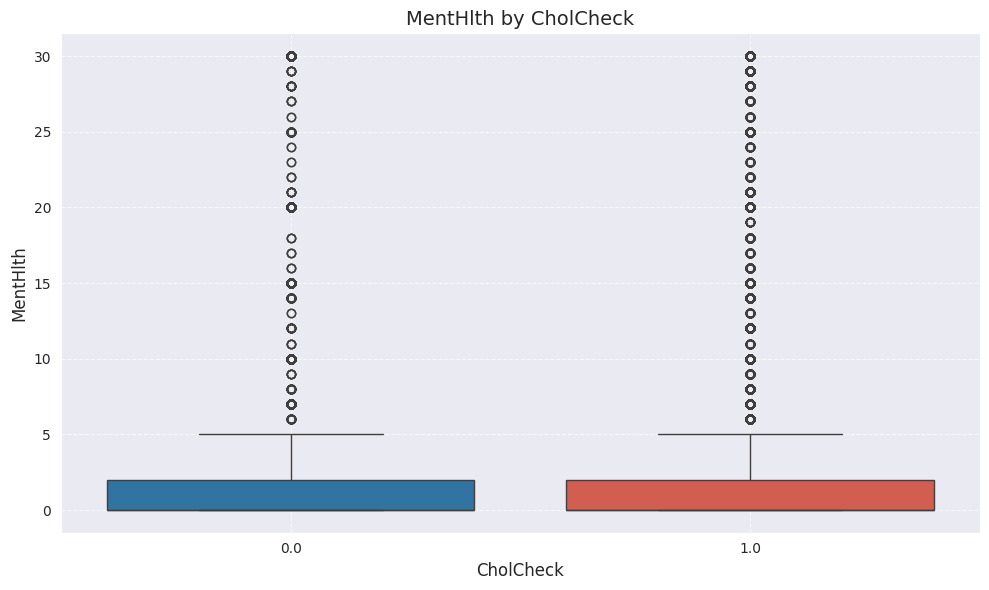

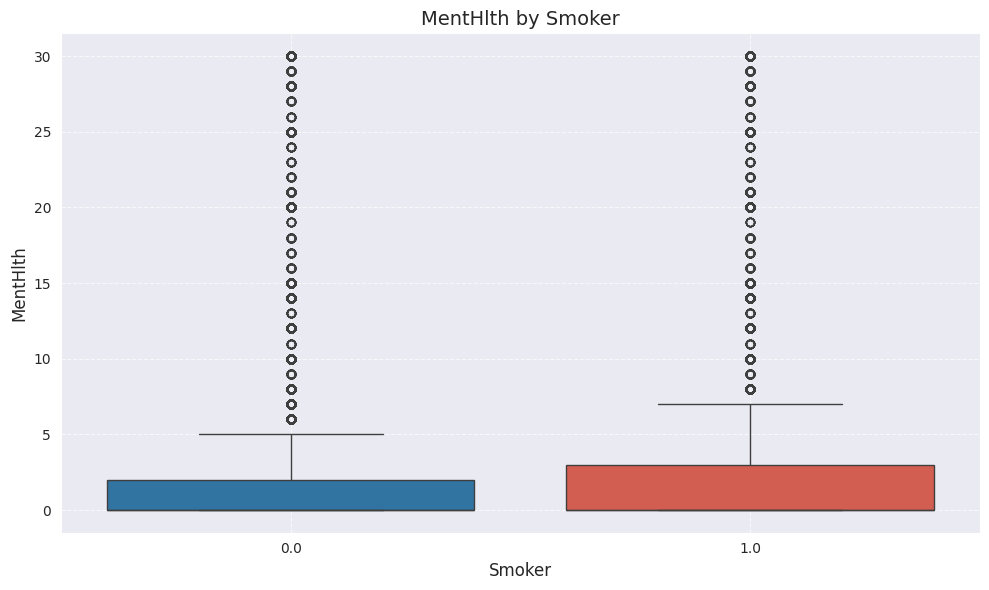

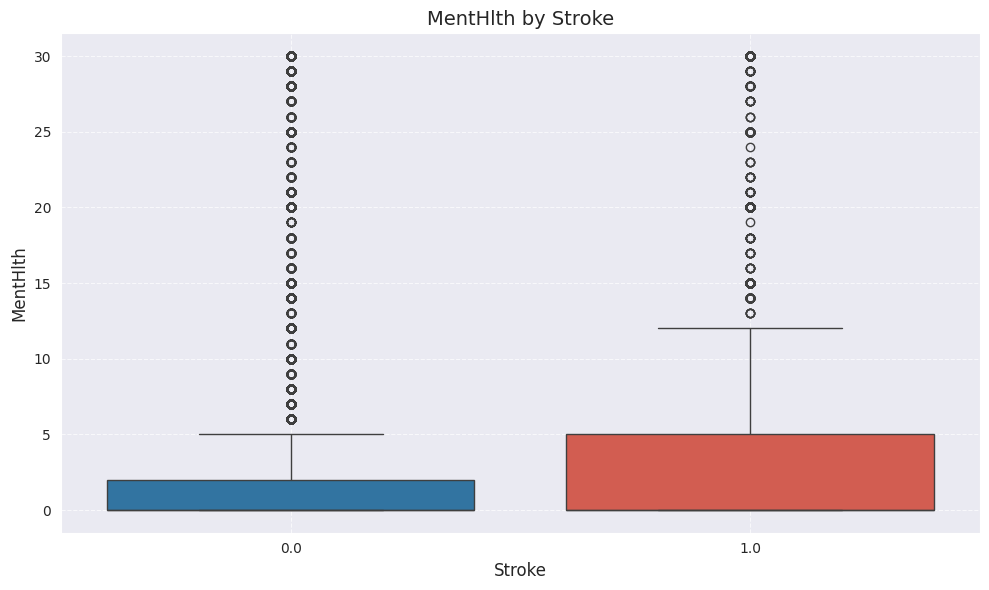

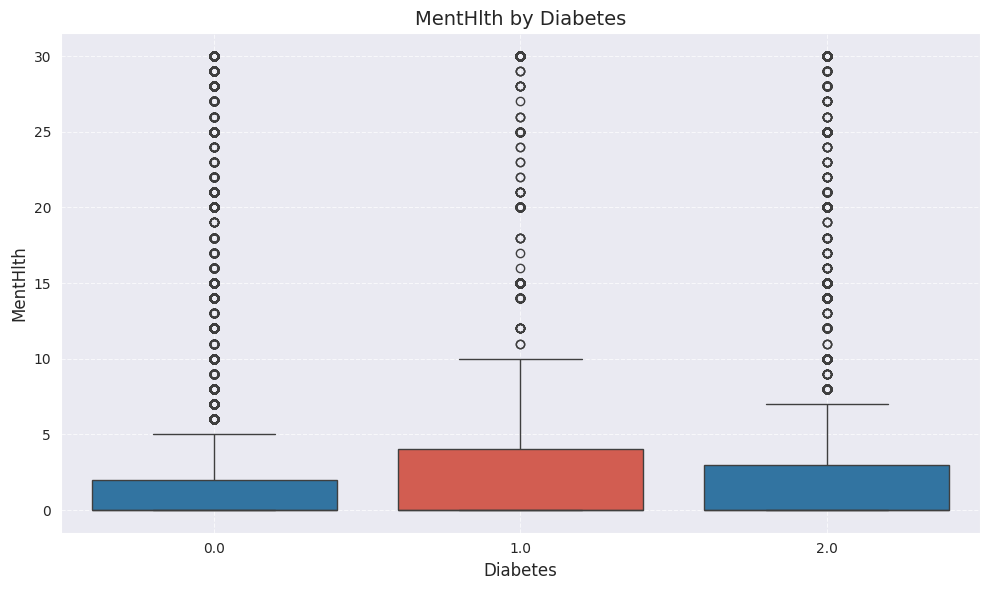

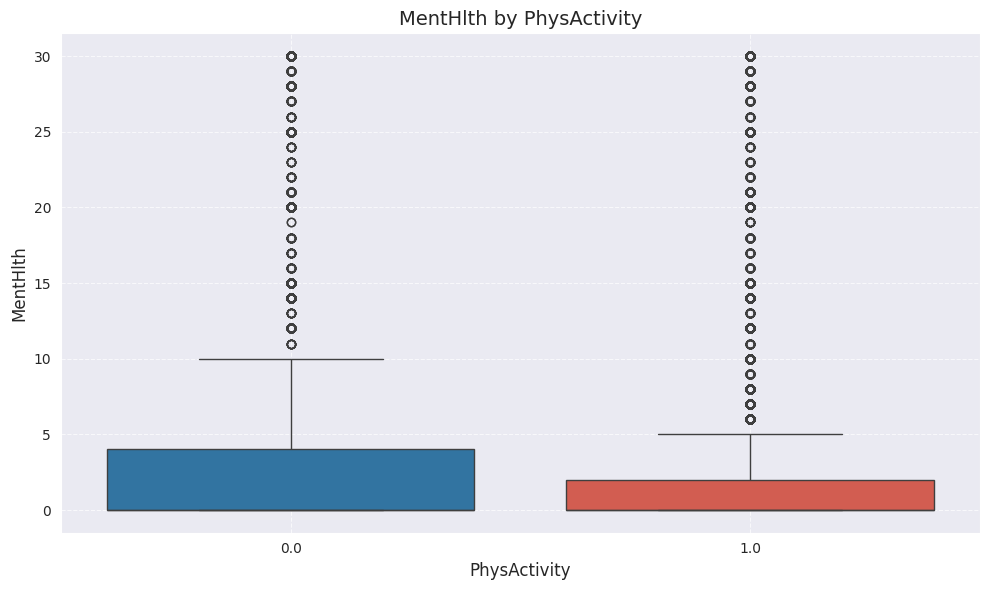

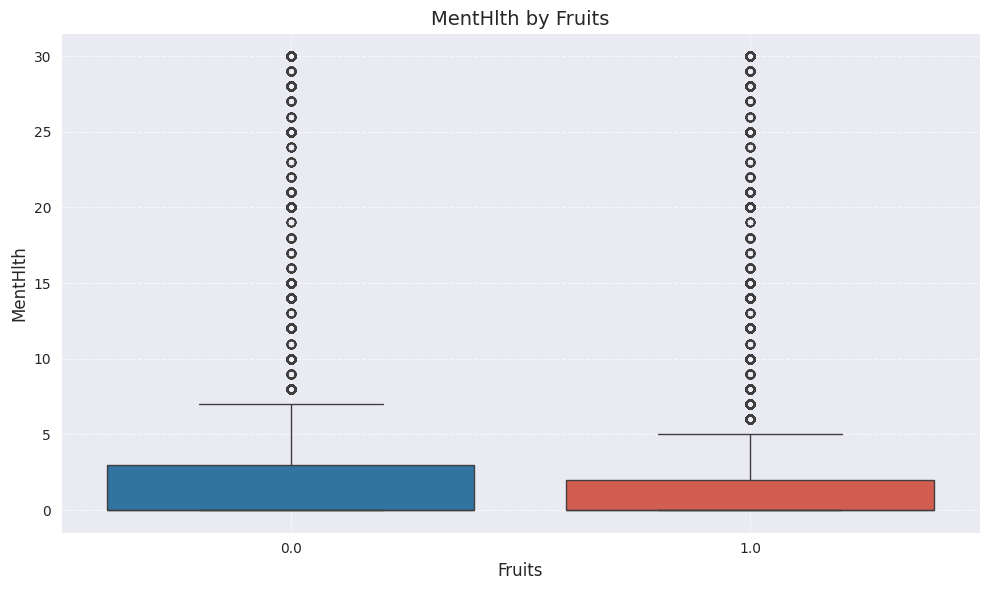

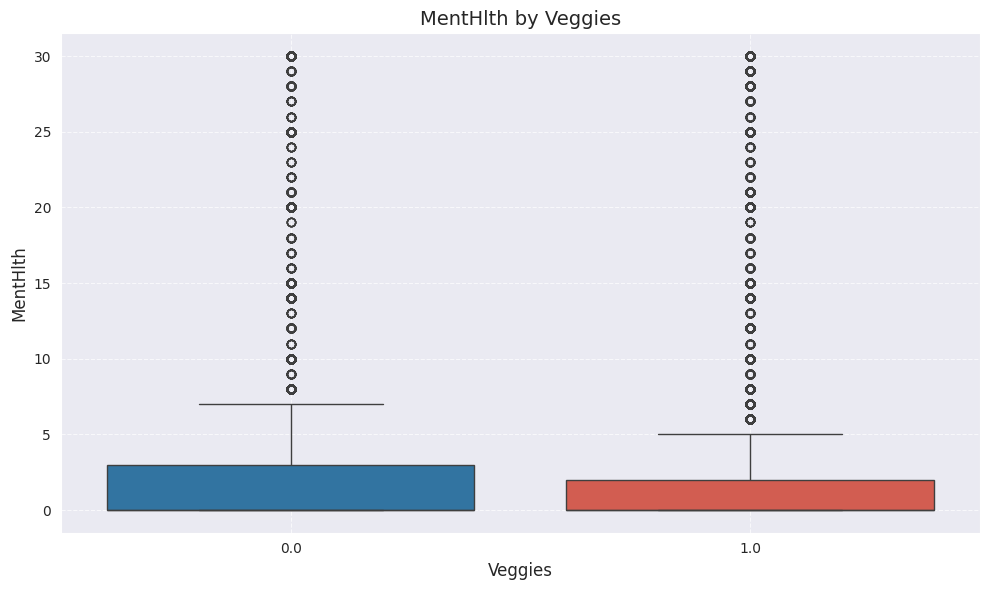

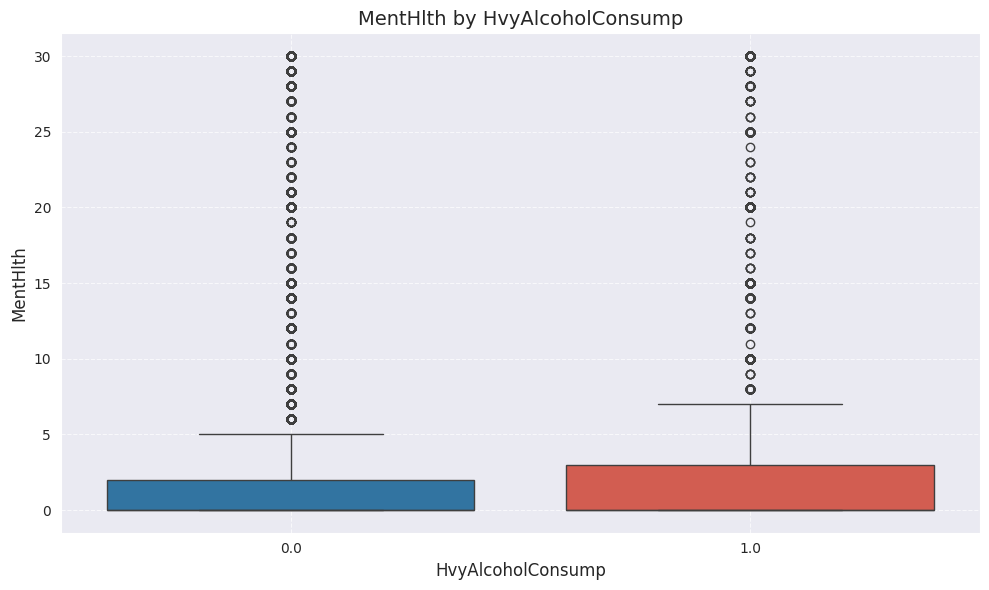

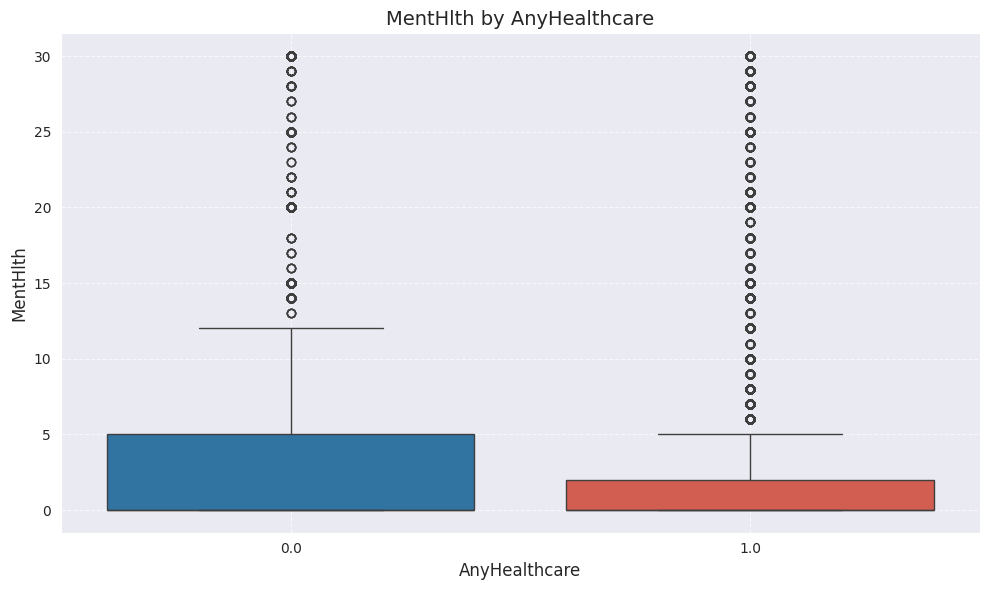

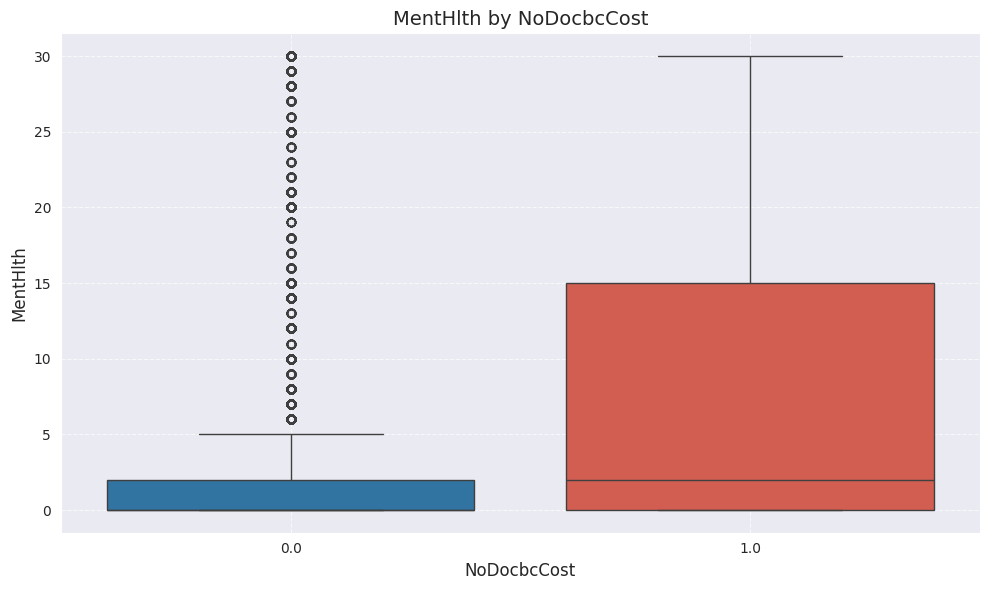

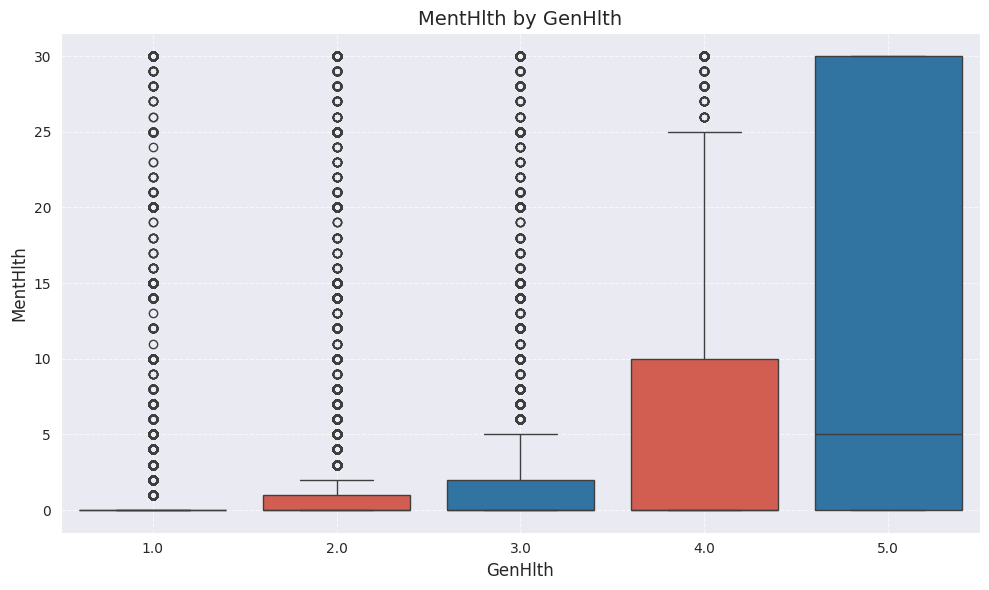

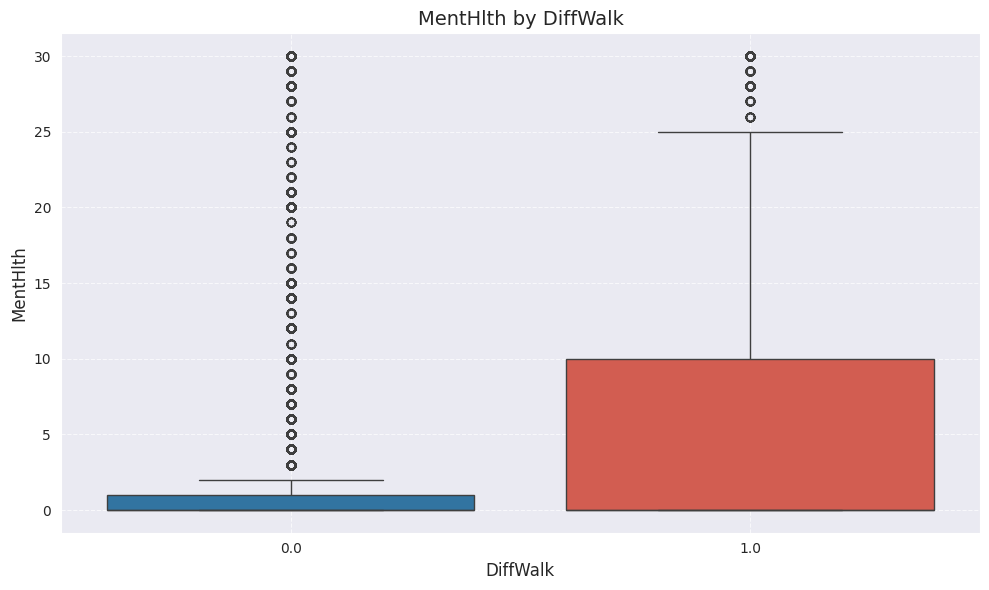

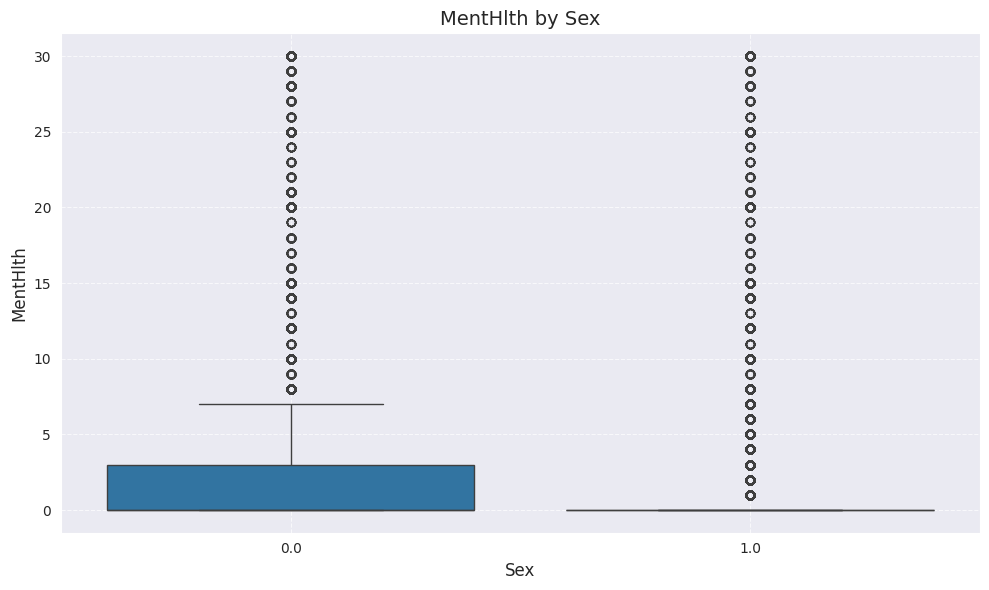

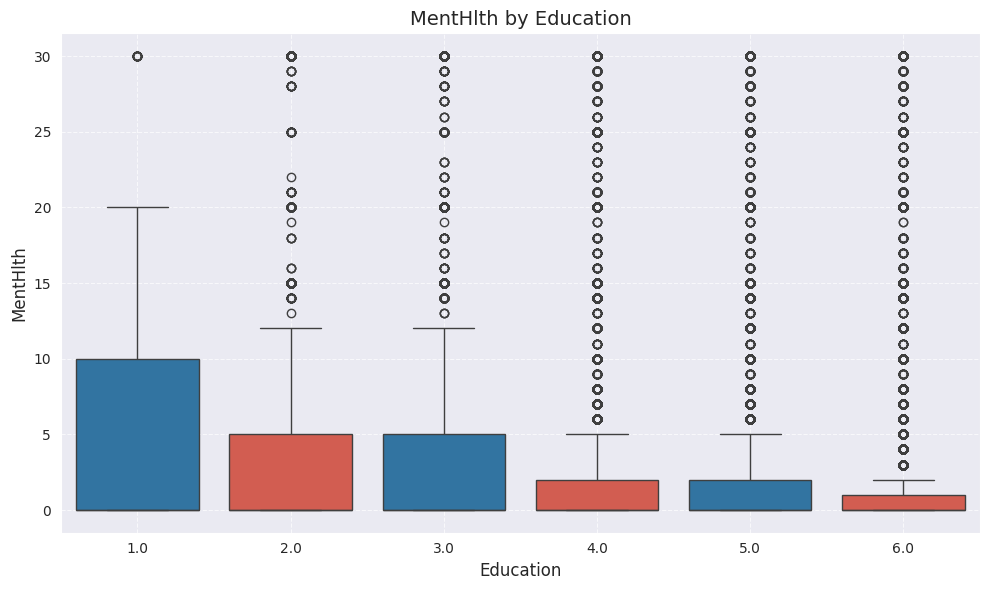

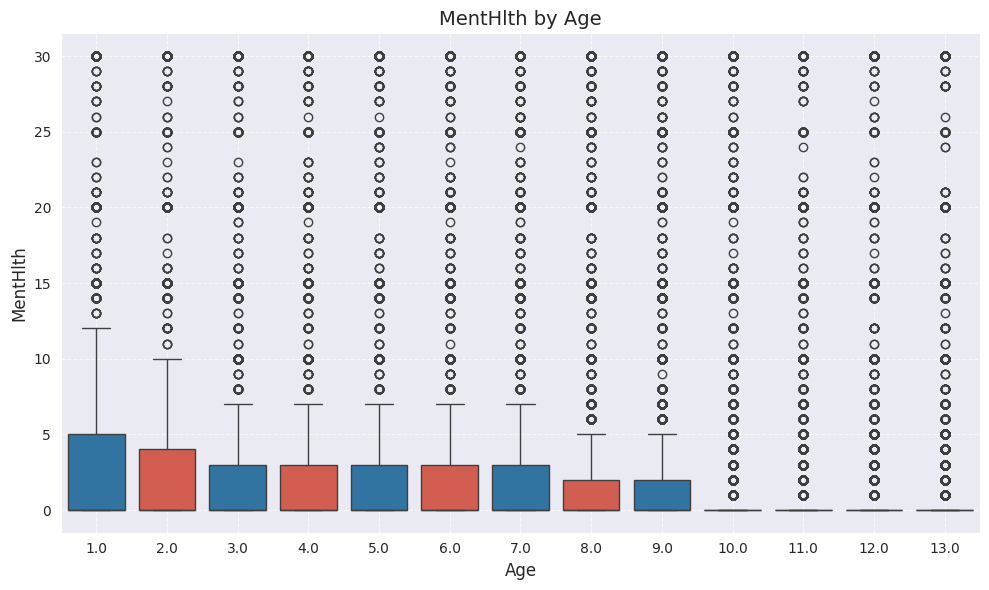

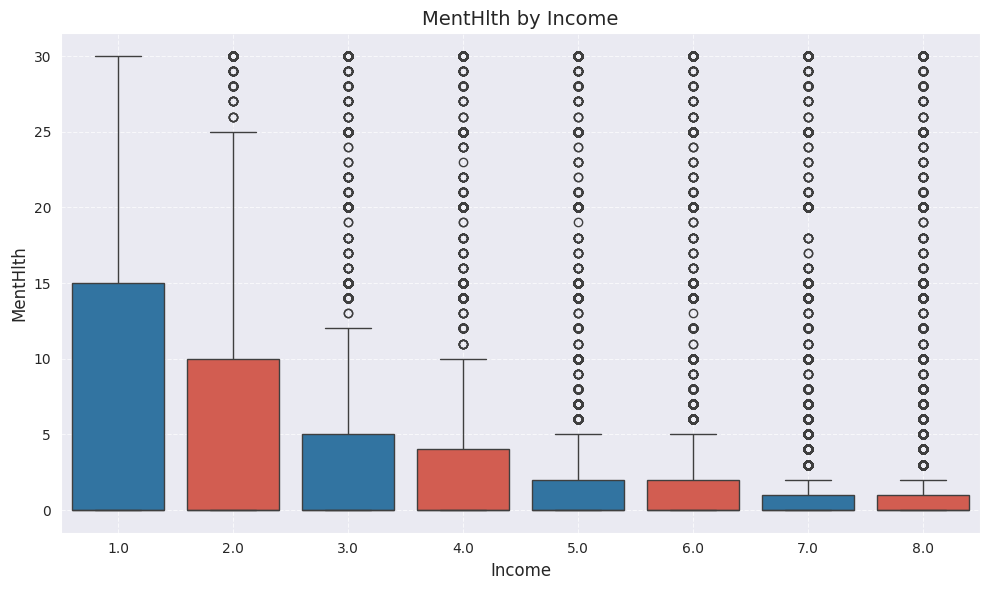

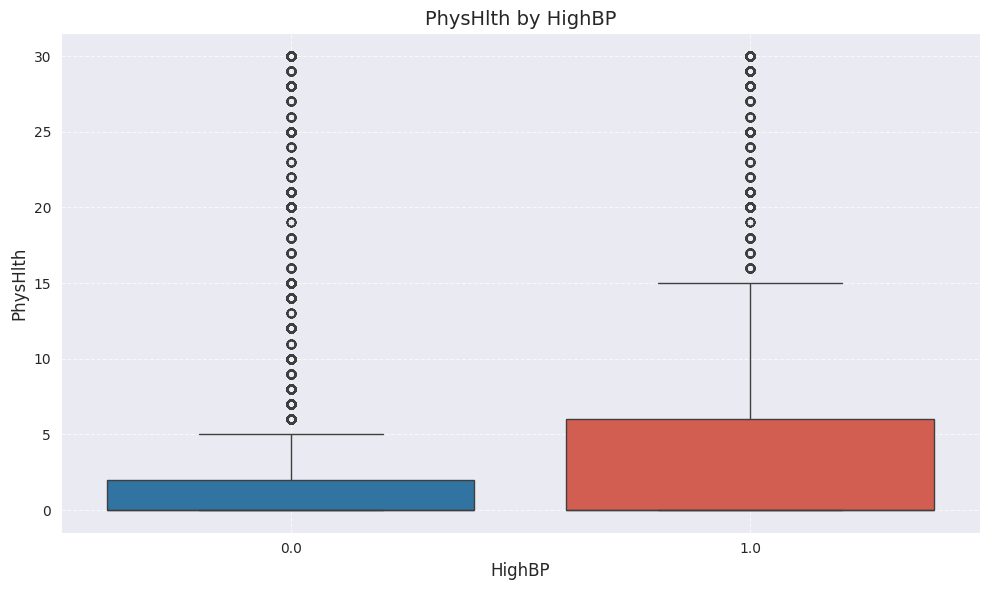

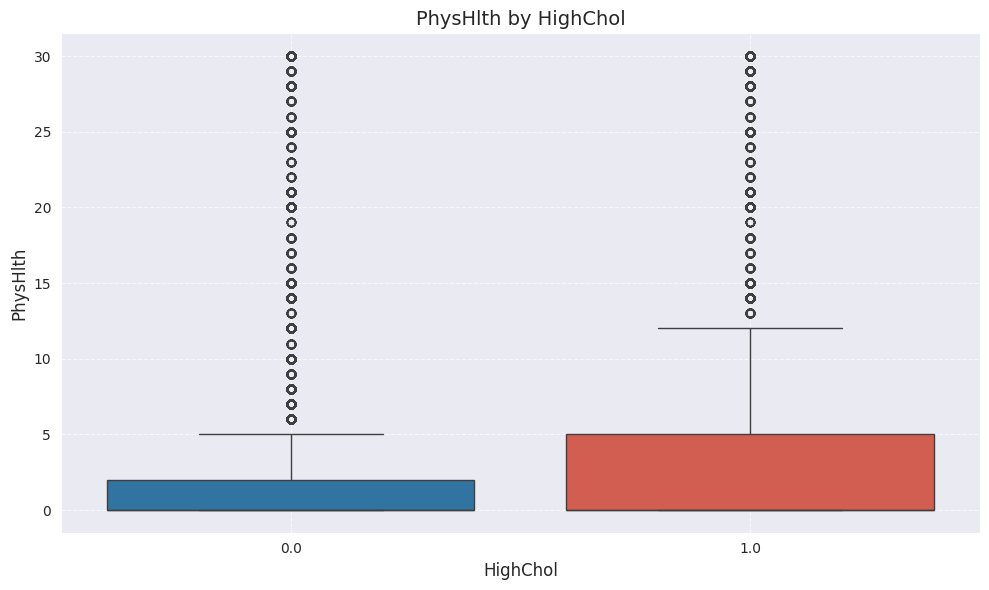

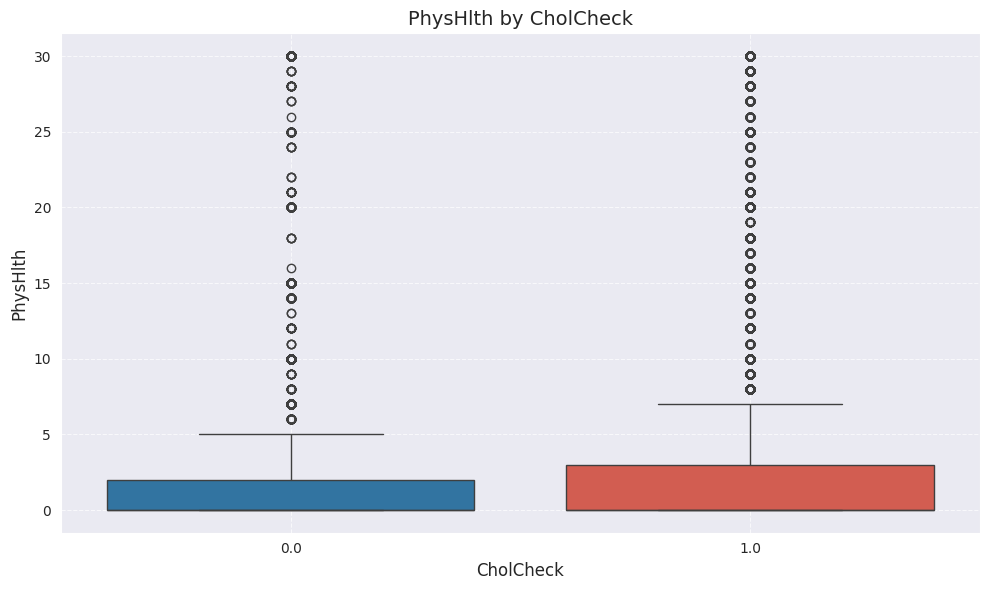

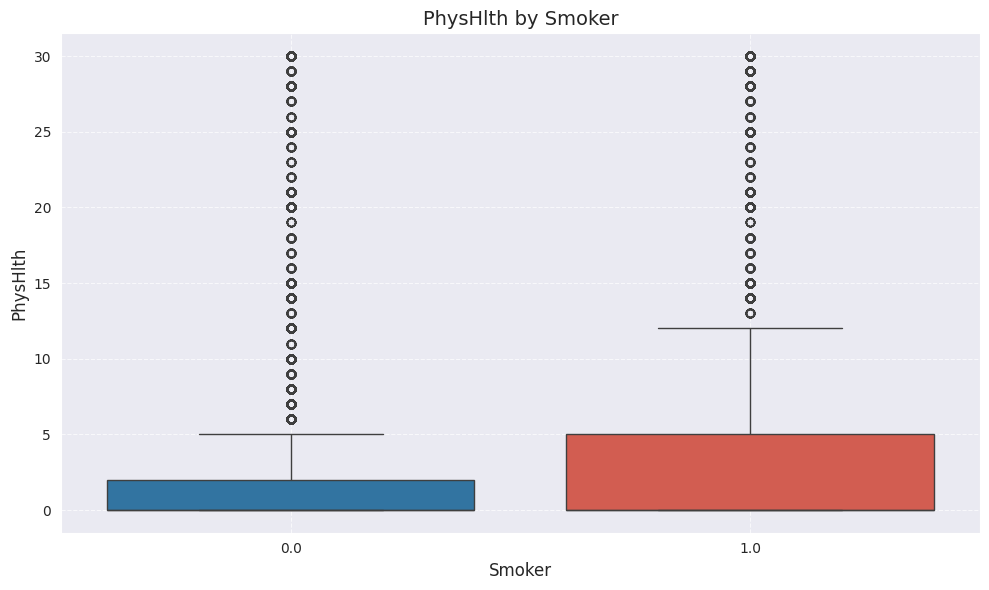

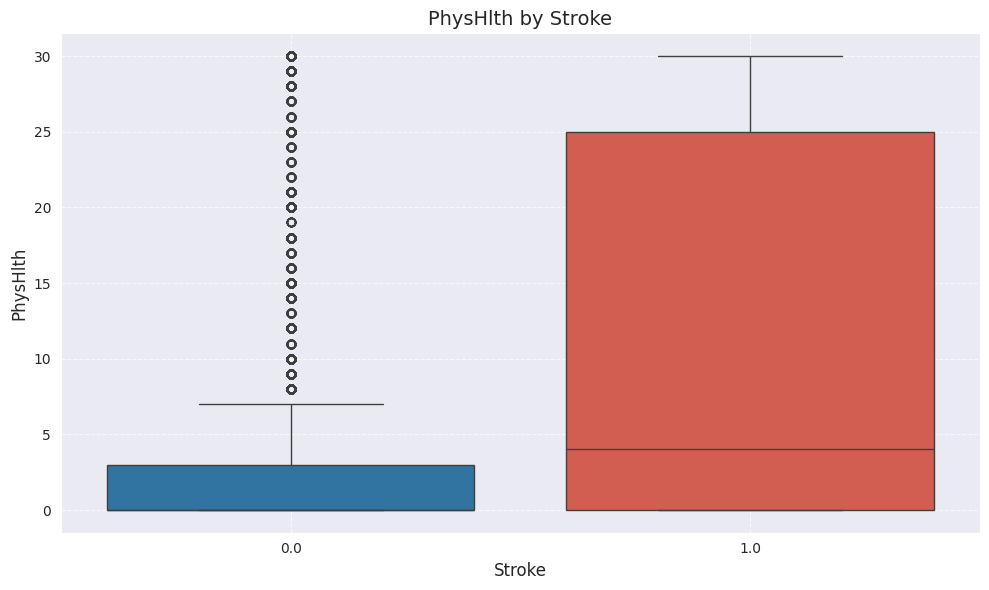

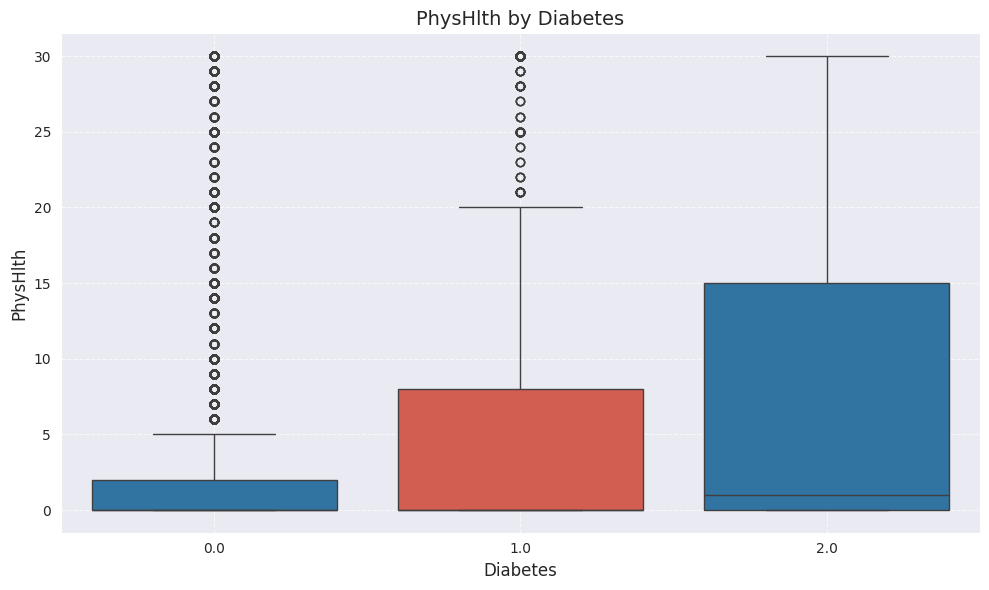

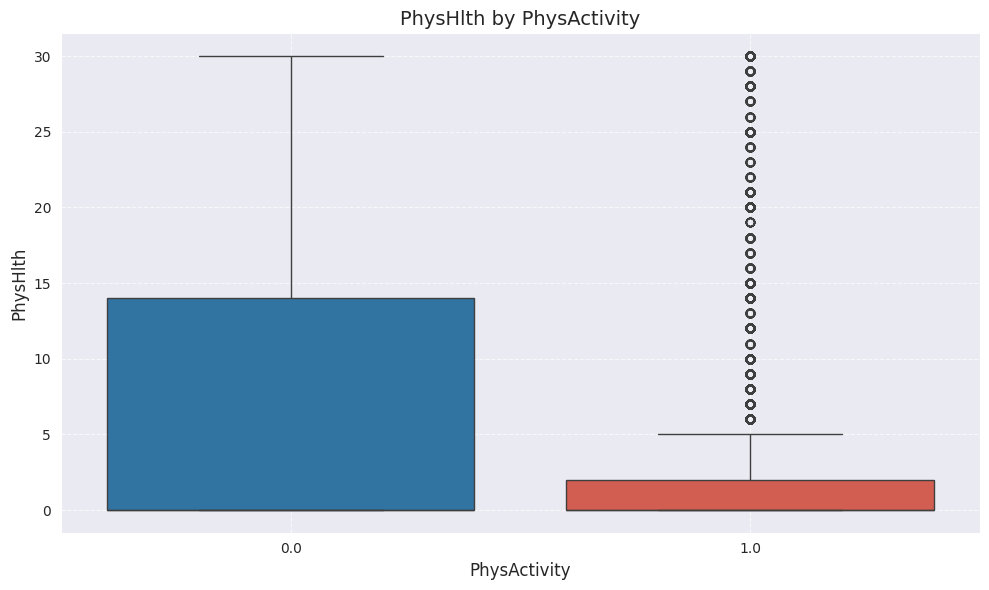

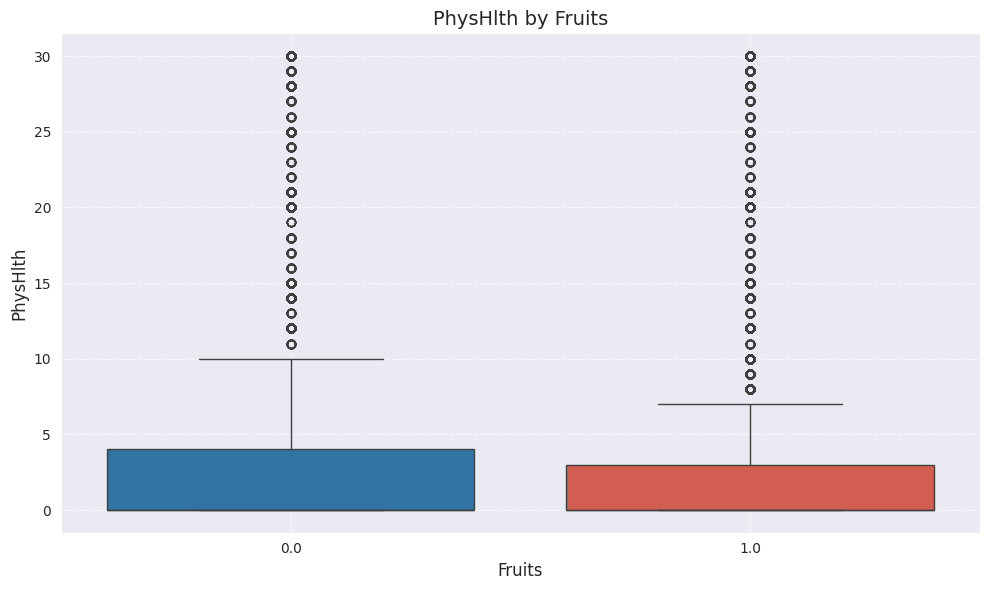

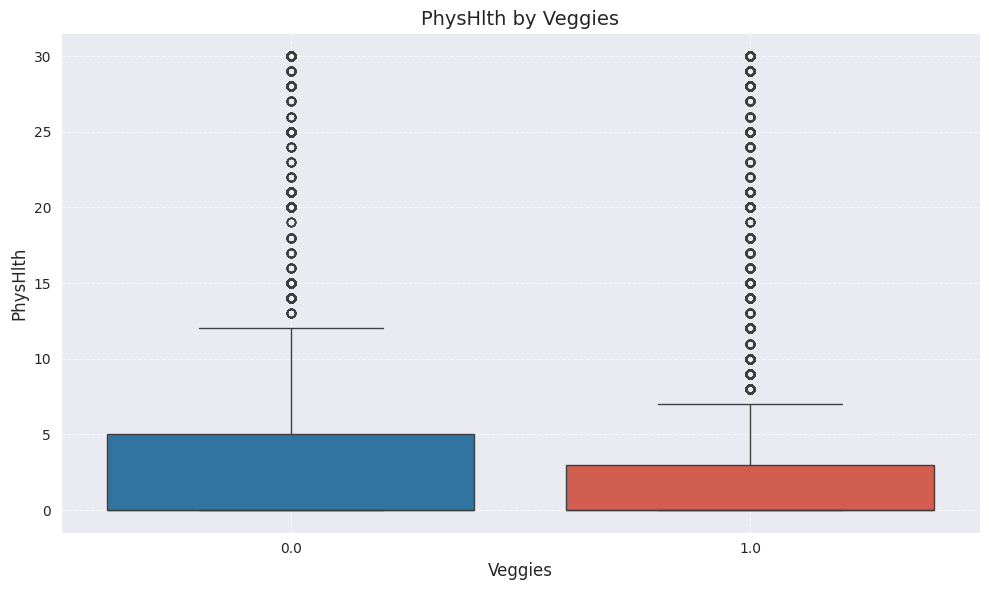

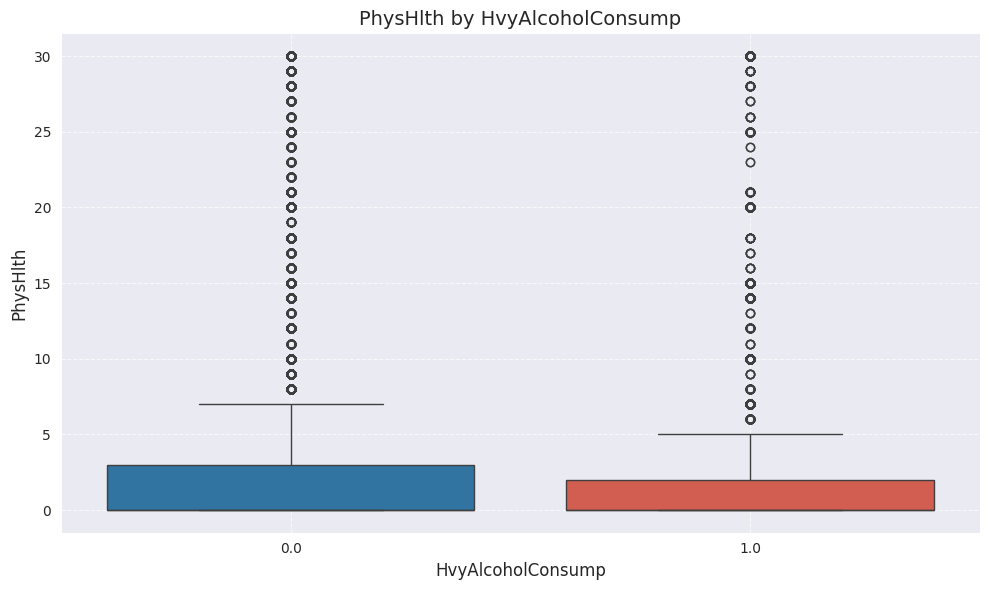

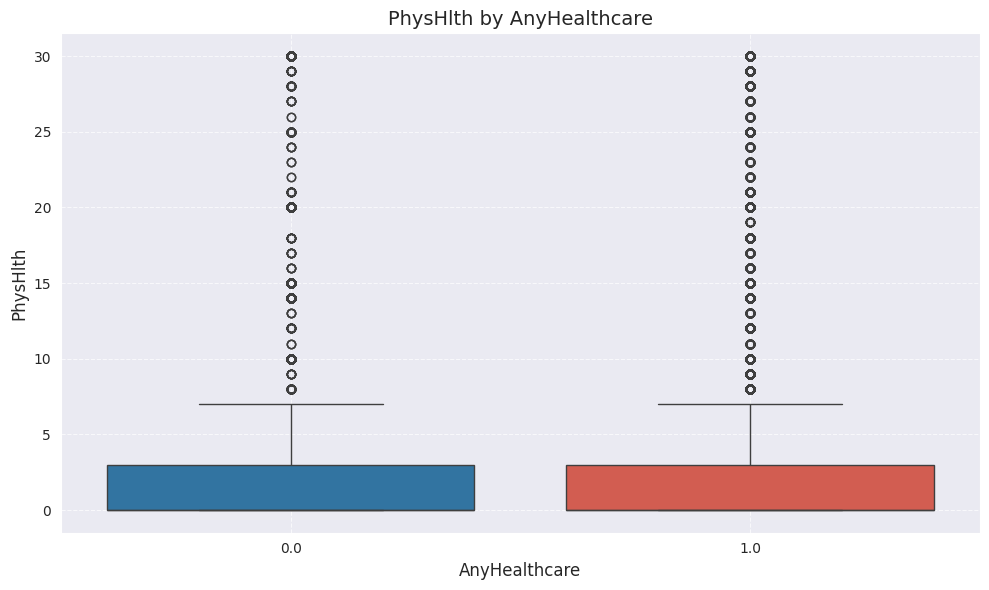

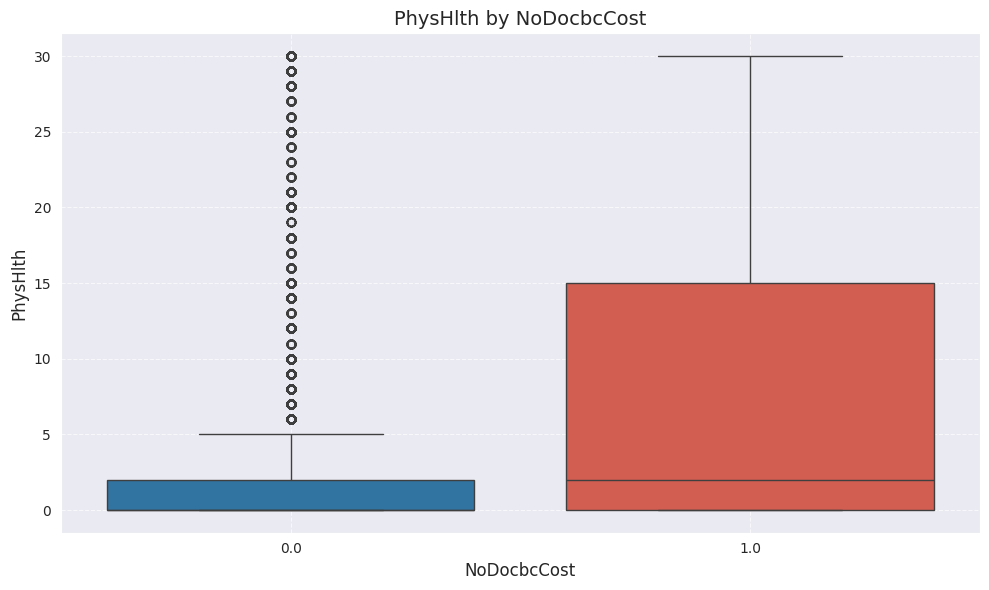

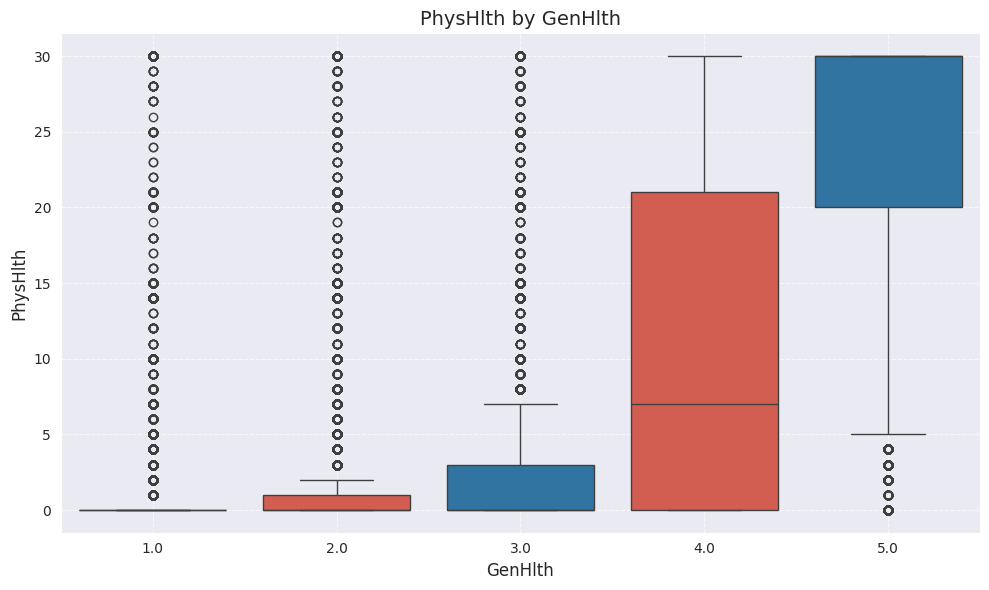

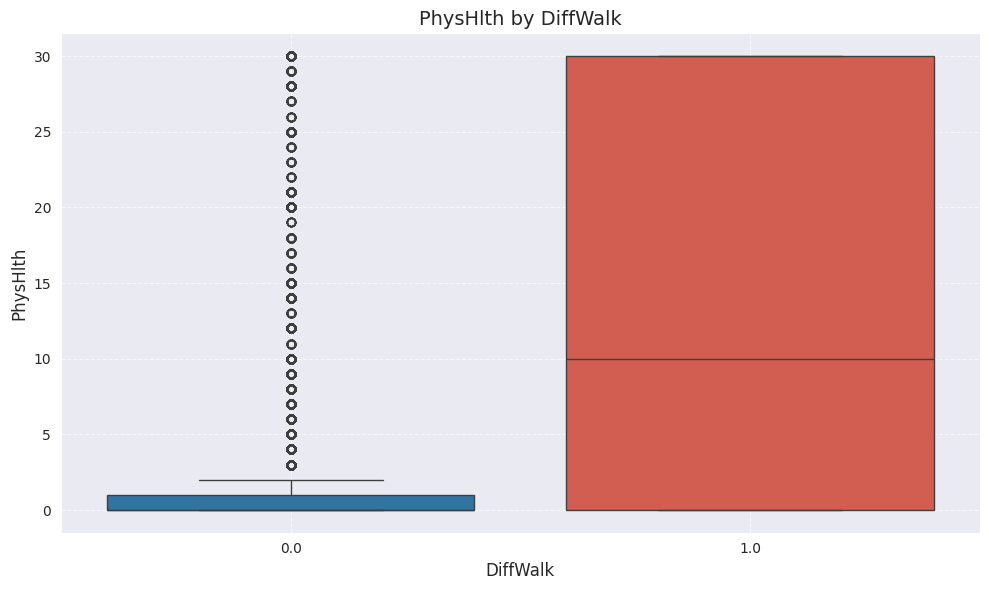

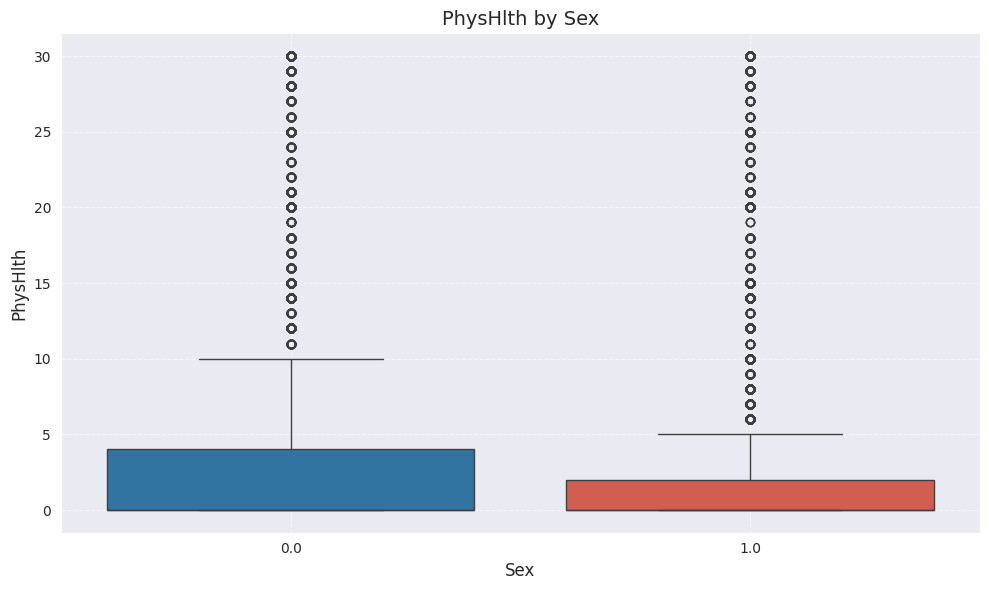

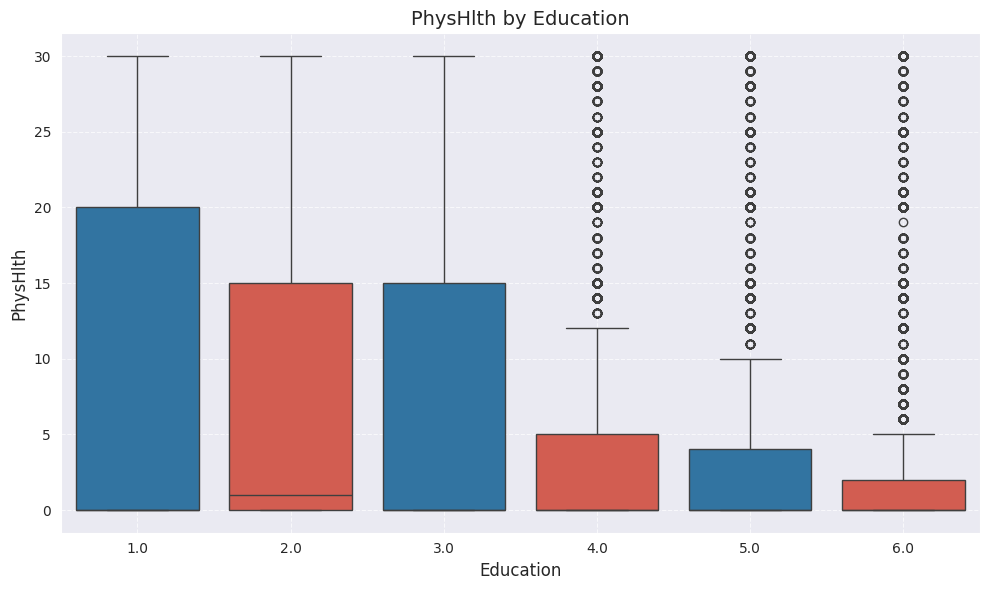

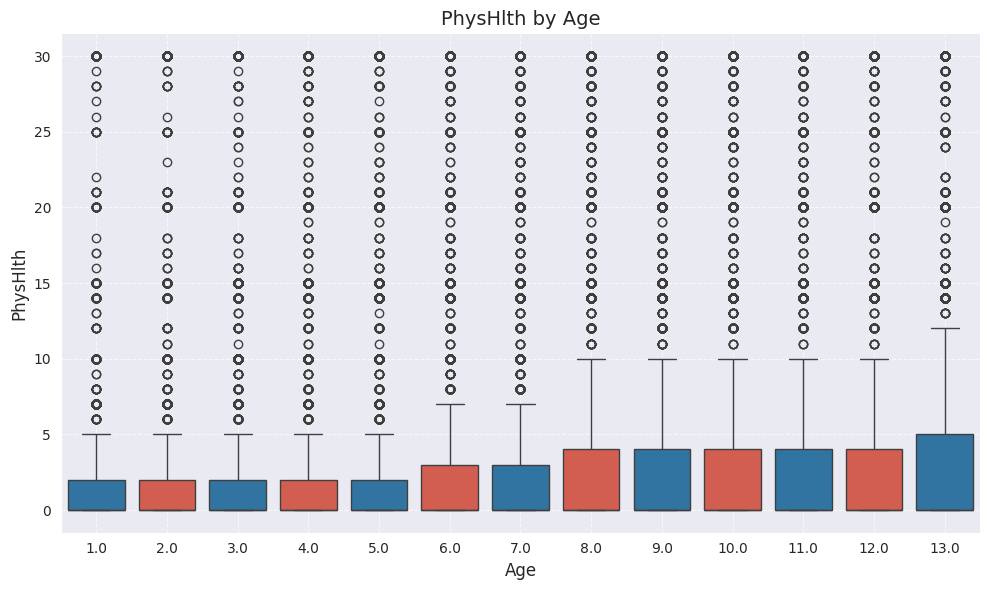

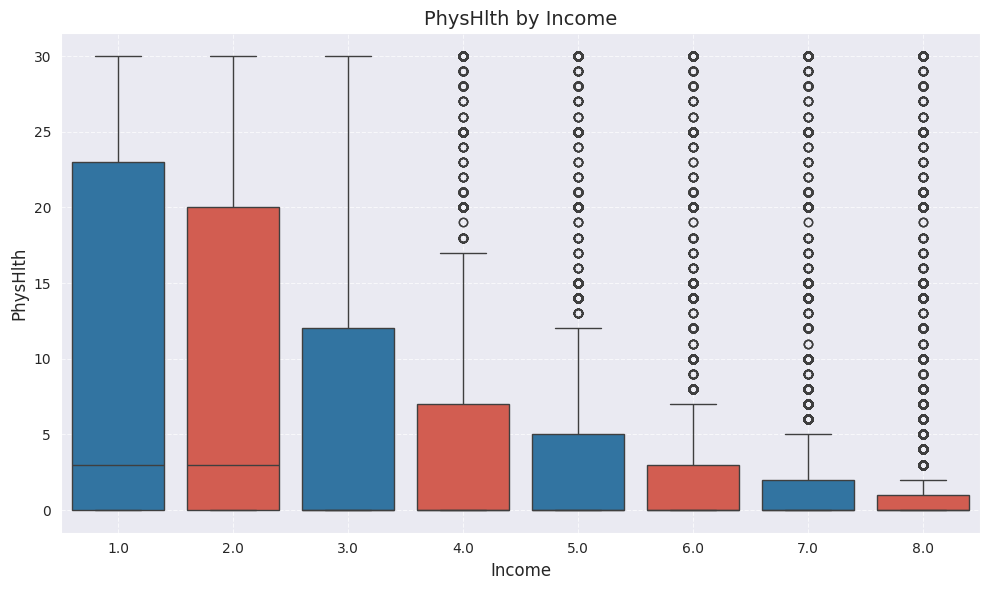

In [15]:
numerical_vars = ['BMI', 'MentHlth', 'PhysHlth']
categorical_vars = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 
                   'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 
                   'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
                   'GenHlth', 'DiffWalk', 'Sex', 'Education', 'Age', 'Income']

for num_var in numerical_vars:
    for cat_var in categorical_vars:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=cat_var, y=num_var, data=data, palette=['#1f77b4', '#e74c3c'])
        plt.title(f'{num_var} by {cat_var}', fontsize=14)
        plt.xlabel(cat_var, fontsize=12)
        plt.ylabel(num_var, fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.savefig(f'pictures/num_cat_relation/{num_var}_by_{cat_var}.jpg', dpi=300)
        plt.show()